In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#GBM, LightGBM, XGBoost, CatBoost

In [ ]:
!pip install catboost optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.6 MB/s eta 0:00:00


###initial


In [ ]:
# Load datasets
train_data = pd.read_csv('/content/663e2b6d54457_train_data_with_samplefeatures.csv')
test_data = pd.read_csv('/content/6644a1e287df6_test_data_with_samplefeatures.csv')
batsman_data = pd.read_csv('/content/663e2b548c98c_batsman_level_scorecard.csv')
bowler_data = pd.read_csv('/content/663e2b2c60743_bowler_level_scorecard.csv')
match_data = pd.read_csv('/content/664389efa0868_match_level_scorecard.csv')


In [ ]:
test_data.head(2)

match id     team1  team1_id  \
0   9250275        Jy     28594   
1   9262189  Ga An Ws     36084   

                                    team1_roster_ids        team2  team2_id  \
0  7438955.0:8271969.0:8369661.0:3685247.0:259025...  Ud Ss of Aa        90   
1  3715690.0:6818622.0:4069666.0:393014.0:4690188...        Ja Ts     36098   

                                    team2_roster_ids  toss winner  \
0  2436944.0:8117500.0:6703528.0:3010748.0:161387...  Ud Ss of Aa   
1  4690258.0:3761246.0:8464385.0:5742470.0:315072...        Ja Ts   

  toss decision     venue  ...    match_dt     lighting           series_name  \
0         field  Bo Ac Cb  ...  2022-07-11    day match  Ud Ss of Aa tr of Ze   
1         field  Pe Sm Ga  ...  2022-09-21  night match              Cn Pr Le   

  season ground_id  team_count_50runs_last15  team_winp_last5  \
0   2022      3226                  0.000000         0.019608   
1   2022     13915                  0.615385         0.344262   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  
0                        NaN                     0.00                     NaN  
1                 151.285714                    66.67                   153.5  

[2 rows x 21 columns]

In [ ]:
train_data.head(2)

match id team1  team1_id  \
0   9331181    Ba     11283   
1   8797060    Ed        20   

                                    team1_roster_ids  team2  team2_id  \
0  9373356.0:7857520.0:4232164.0:4566540.0:329940...  Hl Ph     12634   
1  2089079.0:6139370.0:2076192.0:62432.0:2083409....  Wt Is        41   

                                    team2_roster_ids winner  winner_id  \
0  3500958.0:4231751.0:2735081.0:2035102.0:369833...  Hl Ph      12634   
1  4690258.0:4069666.0:4230127.0:1942317.0:161392...     Ed         20   

  toss winner  ...    match_dt         lighting     series_name   season  \
0       Hl Ph  ...  2022-10-20  day/night match     Sd Mq Ai Ty  2022/23   
1       Wt Is  ...  2022-01-23  day/night match  Ed tr of Wt Is  2021/22   

  ground_id team_count_50runs_last15 team_winp_last5  \
0      7398                 1.666667        0.672131   
1      1406                 1.285714        1.952381   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  
0                      139.0                    100.0              157.178571  
1                      156.0                     50.0              103.500000  

[2 rows x 23 columns]

In [ ]:
test_data.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'toss winner', 'toss decision', 'venue',
       'city', 'match_dt', 'lighting', 'series_name', 'season', 'ground_id',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15'],
      dtype='object')

In [ ]:
train_data.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15'],
      dtype='object')

In [ ]:
train_data.shape

(948, 23)

In [ ]:
match_data.shape

(1689, 30)

In [ ]:
train_data_1 = train_data.drop(columns=['match_dt', 'team1_roster_ids', 'team2_roster_ids',  'series_name', 'season', 'city'])

In [ ]:
test_data_1 = test_data.drop(columns=['match_dt', 'team1_roster_ids', 'team2_roster_ids',  'series_name', 'season', 'city'])

In [ ]:
train_data_1.columns

Index(['match id', 'team1', 'team1_id', 'team2', 'team2_id', 'winner',
       'winner_id', 'toss winner', 'toss decision', 'venue', 'lighting',
       'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15'],
      dtype='object')

In [ ]:
train_data_1.head(2)

match id team1  team1_id  team2  team2_id winner  winner_id toss winner  \
0   9331181    Ba     11283  Hl Ph     12634  Hl Ph      12634       Hl Ph   
1   8797060    Ed        20  Wt Is        41     Ed         20       Wt Is   

  toss decision        venue         lighting  ground_id  \
0         field  Hr Ct Sm Ie  day/night match       7398   
1         field  Kn Ol Bn Bs  day/night match       1406   

   team_count_50runs_last15  team_winp_last5  team1only_avg_runs_last15  \
0                  1.666667         0.672131                      139.0   
1                  1.285714         1.952381                      156.0   

   team1_winp_team2_last15  ground_avg_runs_last15  
0                    100.0              157.178571  
1                     50.0              103.500000

In [ ]:
test_data_1.head(2)

match id  team1_id  team2_id  lighting  ground_id  \
0   9250275     28594        90         0         34   
1   9262189     36084     36098         2         74   

   team_count_50runs_last15  team_winp_last5  team1only_avg_runs_last15  \
0                  0.000000         0.019608                 160.460540   
1                  0.615385         0.344262                 151.285714   

   team1_winp_team2_last15  ground_avg_runs_last15  team_batting_first  \
0                     0.00              154.293439               28594   
1                    66.67              153.500000               36084   

   team_batting_second  
0                   90  
1                36098

In [ ]:
train_data_1.shape

(948, 17)

In [ ]:
test_data_1.columns

Index(['match id', 'team1', 'team1_id', 'team2', 'team2_id', 'toss winner',
       'toss decision', 'venue', 'lighting', 'ground_id',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15'],
      dtype='object')

In [ ]:
test_data_1.shape

(271, 15)

In [ ]:
'''
# Define a function to determine which team bats first
def determine_batting_first(row):
    if row['toss winner'] == row['team1']:
        if row['toss decision'] == 'bat':
            return row['team1']
        else:
            return row['team2']
    else:
        if row['toss decision'] == 'bat':
            return row['team2']
        else:
            return row['team1']

# Apply the function and create a new column
train_data_1['team_batting_first'] = train_data_1.apply(determine_batting_first, axis=1)
test_data_1['team_batting_first'] = test_data_1.apply(determine_batting_first, axis=1)


In [ ]:
'''
def batting_second(row):
    if row['team_batting_first'] == row['team1']:
        return row['team2']
    else:
        return row['team1']

train_data_1['team_batting_second'] = train_data_1.apply(batting_second, axis=1)
test_data_1['team_batting_second'] = test_data_1.apply(batting_second, axis=1)

In [ ]:
# Define a function to determine which team bats first
def determine_batting_first(row):
    if row['toss winner'] == row['team1']:
        if row['toss decision'] == 'bat':
            return row['team1_id']
        else:
            return row['team2_id']
    else:
        if row['toss decision'] == 'bat':
            return row['team2_id']
        else:
            return row['team1_id']

# Apply the function and create a new column
train_data_1['team_batting_first'] = train_data_1.apply(determine_batting_first, axis=1)
test_data_1['team_batting_first'] = test_data_1.apply(determine_batting_first, axis=1)


In [ ]:

def batting_second(row):
    if row['team_batting_first'] == row['team1_id']:
        return row['team2_id']
    else:
        return row['team1_id']

train_data_1['team_batting_second'] = train_data_1.apply(batting_second, axis=1)
test_data_1['team_batting_second'] = test_data_1.apply(batting_second, axis=1)

In [ ]:
train_data_1.shape

(948, 19)

In [ ]:
test_data_1.shape

(271, 17)

In [ ]:
train_data_1.head(2)

match id team1  team1_id  team2  team2_id winner  winner_id toss winner  \
0   9331181    Ba     11283  Hl Ph     12634  Hl Ph      12634       Hl Ph   
1   8797060    Ed        20  Wt Is        41     Ed         20       Wt Is   

  toss decision        venue         lighting  ground_id  \
0         field  Hr Ct Sm Ie  day/night match       7398   
1         field  Kn Ol Bn Bs  day/night match       1406   

   team_count_50runs_last15  team_winp_last5  team1only_avg_runs_last15  \
0                  1.666667         0.672131                      139.0   
1                  1.285714         1.952381                      156.0   

   team1_winp_team2_last15  ground_avg_runs_last15  team_batting_first  \
0                    100.0              157.178571               11283   
1                     50.0              103.500000                  20   

   team_batting_second  
0                12634  
1                   41

In [ ]:
test_data_1.head(2)

match id     team1  team1_id        team2  team2_id  toss winner  \
0   9250275        Jy     28594  Ud Ss of Aa        90  Ud Ss of Aa   
1   9262189  Ga An Ws     36084        Ja Ts     36098        Ja Ts   

  toss decision     venue     lighting  ground_id  team_count_50runs_last15  \
0         field  Bo Ac Cb    day match       3226                  0.000000   
1         field  Pe Sm Ga  night match      13915                  0.615385   

   team_winp_last5  team1only_avg_runs_last15  team1_winp_team2_last15  \
0         0.019608                        NaN                     0.00   
1         0.344262                 151.285714                    66.67   

   ground_avg_runs_last15  team_batting_first  team_batting_second  
0                     NaN               28594                   90  
1                   153.5               36084                36098

In [ ]:
train_data_1 = train_data_1.drop(columns=['toss winner', 'toss decision'])
test_data_1 = test_data_1.drop(columns=['toss winner', 'toss decision'])

In [ ]:
train_data_1.head(2)

match id team1  team1_id  team2  team2_id winner  winner_id        venue  \
0   9331181    Ba     11283  Hl Ph     12634  Hl Ph      12634  Hr Ct Sm Ie   
1   8797060    Ed        20  Wt Is        41     Ed         20  Kn Ol Bn Bs   

          lighting  ground_id  team_count_50runs_last15  team_winp_last5  \
0  day/night match       7398                  1.666667         0.672131   
1  day/night match       1406                  1.285714         1.952381   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  \
0                      139.0                    100.0              157.178571   
1                      156.0                     50.0              103.500000   

   team_batting_first  team_batting_second  
0               11283                12634  
1                  20                   41

In [ ]:
test_data_1.head(2)

match id     team1  team1_id        team2  team2_id     venue     lighting  \
0   9250275        Jy     28594  Ud Ss of Aa        90  Bo Ac Cb    day match   
1   9262189  Ga An Ws     36084        Ja Ts     36098  Pe Sm Ga  night match   

   ground_id  team_count_50runs_last15  team_winp_last5  \
0       3226                  0.000000         0.019608   
1      13915                  0.615385         0.344262   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  \
0                        NaN                     0.00                     NaN   
1                 151.285714                    66.67                   153.5   

  team_batting_first team_batting_second  
0                 Jy         Ud Ss of Aa  
1           Ga An Ws               Ja Ts

In [ ]:
train_data_1.shape

(948, 17)

In [ ]:
test_data_1.shape

(271, 15)

In [ ]:
train_data_1.columns

Index(['match id', 'team1', 'team1_id', 'team2', 'team2_id', 'winner',
       'winner_id', 'venue', 'lighting', 'ground_id',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'team_batting_first', 'team_batting_second'],
      dtype='object')

In [ ]:
test_data_1.columns

Index(['match id', 'team1', 'team1_id', 'team2', 'team2_id', 'venue',
       'lighting', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'team_batting_first', 'team_batting_second'],
      dtype='object')

In [ ]:
train_data_1 = train_data_1.drop(columns=['winner', 'team1', 'team2', 'venue'])
test_data_1 = test_data_1.drop(columns=['team1', 'team2', 'venue'])

In [ ]:
train_data_1.head(2)

match id  team1_id  team2_id  winner_id         lighting  ground_id  \
0   9331181     11283     12634      12634  day/night match       7398   
1   8797060        20        41         20  day/night match       1406   

   team_count_50runs_last15  team_winp_last5  team1only_avg_runs_last15  \
0                  1.666667         0.672131                      139.0   
1                  1.285714         1.952381                      156.0   

   team1_winp_team2_last15  ground_avg_runs_last15  team_batting_first  \
0                    100.0              157.178571               11283   
1                     50.0              103.500000                  20   

   team_batting_second  
0                12634  
1                   41

In [ ]:
test_data_1.head(2)

match id  team1_id  team2_id     lighting  ground_id  \
0   9250275     28594        90    day match       3226   
1   9262189     36084     36098  night match      13915   

   team_count_50runs_last15  team_winp_last5  team1only_avg_runs_last15  \
0                  0.000000         0.019608                        NaN   
1                  0.615385         0.344262                 151.285714   

   team1_winp_team2_last15  ground_avg_runs_last15  team_batting_first  \
0                     0.00                     NaN               11283   
1                    66.67                   153.5                  20   

   team_batting_second  
0                12634  
1                   41

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['lighting', 'ground_id']:
    train_data_1[col] = label_encoder.fit_transform(train_data_1[col])
    test_data_1[col] = label_encoder.fit_transform(test_data_1[col])



In [ ]:
train_data_1.fillna(train_data_1.mean(), inplace=True)
test_data_1.fillna(test_data_1.mean(), inplace=True)



In [ ]:
train_data_1.isna().sum()

match id                     0
team1_id                     0
team2_id                     0
winner_id                    0
lighting                     0
ground_id                    0
team_count_50runs_last15     0
team_winp_last5              0
team1only_avg_runs_last15    0
team1_winp_team2_last15      0
ground_avg_runs_last15       0
team_batting_first           0
team_batting_second          0
dtype: int64

In [ ]:
test_data_1.isna().sum()

match id                     0
team1_id                     0
team2_id                     0
lighting                     0
ground_id                    0
team_count_50runs_last15     0
team_winp_last5              0
team1only_avg_runs_last15    0
team1_winp_team2_last15      0
ground_avg_runs_last15       0
team_batting_first           0
team_batting_second          0
dtype: int64

In [ ]:
train_data_1.head(2)

match id  team1_id  team2_id  winner_id  lighting  ground_id  \
0   9331181     11283     12634      12634         1         70   
1   8797060        20        41         20         1         19   

   team_count_50runs_last15  team_winp_last5  team1only_avg_runs_last15  \
0                  1.666667         0.672131                      139.0   
1                  1.285714         1.952381                      156.0   

   team1_winp_team2_last15  ground_avg_runs_last15  team_batting_first  \
0                    100.0              157.178571               11283   
1                     50.0              103.500000                  20   

   team_batting_second  
0                12634  
1                   41

In [ ]:
test_data_1.head(2)

match id  team1_id  team2_id  lighting  ground_id  \
0   9250275     28594        90         0         34   
1   9262189     36084     36098         2         74   

   team_count_50runs_last15  team_winp_last5  team1only_avg_runs_last15  \
0                  0.000000         0.019608                 160.460540   
1                  0.615385         0.344262                 151.285714   

   team1_winp_team2_last15  ground_avg_runs_last15  team_batting_first  \
0                     0.00              154.293439               28594   
1                    66.67              153.500000               36084   

   team_batting_second  
0                   90  
1                36098

In [ ]:
train_data_1['target'] = np.where(train_data_1['winner_id'] == train_data_1['team1_id'], 1, 0)

In [ ]:
train_data_1

match id     team1  team1_id     team2  team2_id    winner  winner_id  \
0     9331181        Ba     11283     Hl Ph     12634     Hl Ph      12634   
1     8797060        Ed        20     Wt Is        41        Ed         20   
2     9433269        We     10576        Ne      8987        We      10576   
3     9587073  Ga An Ws     36084     Bs Rs     36070  Ga An Ws      36084   
4     9516457     Pb Ks     30407     Gt Ts     48341     Gt Ts      48341   
..        ...       ...       ...       ...       ...       ...        ...   
943   9128601     Pb Ks     30407  Ci Sr Ks     30414     Pb Ks      30407   
944   9433241        Mx      8700        St      9701        St       9701   
945   9097227        Bd     22497     Wn Pe     23869     Wn Pe      23869   
946   9516695     Rn Rs     30428     Ss Hd     36014     Ss Hd      36014   
947   9433633        He      7727        Ge      7608        Ge       7608   

    toss winner toss decision                    venue         lighting  \
0         Hl Ph         field              Hr Ct Sm Ie  day/night match   
1         Wt Is         field              Kn Ol Bn Bs  day/night match   
2            Ne         field                 Tt Be Nm  day/night match   
3      Ga An Ws           bat           Bn La Sm Ta Td        day match   
4         Gt Ts         field  Pb Ct An IS Ba Sm Mi Ch      night match   
..          ...           ...                      ...              ...   
943    Ci Sr Ks         field                 We Sm Mi      night match   
944          St         field        Te Cr As Cy Gd Tn  day/night match   
945          Bd           bat           St Gs Pk Pt Eh        day match   
946       Rn Rs           bat              Si Mh Sm Jr      night match   
947          Ge         field                 Cy Gd Bl  day/night match   

     ground_id  team_count_50runs_last15  team_winp_last5  \
0         7398                  1.666667         0.672131   
1         1406                  1.285714         1.952381   
2          251                  0.857143         0.672131   
3        14300                  2.166667         1.975610   
4         7118                  0.818182         1.327869   
..         ...                       ...              ...   
943       5004                  0.823529         1.000000   
944       1042                  1.571429         0.012346   
945       1224                  3.000000         1.000000   
946       4661                  0.789474         1.487805   
947       1245                  4.000000         1.975610   

     team1only_avg_runs_last15  team1_winp_team2_last15  \
0                   139.000000                   100.00   
1                   156.000000                    50.00   
2                   173.266667                     0.00   
3                   164.266667                    50.00   
4                   164.666667                     0.00   
..                         ...                      ...   
943                 147.333333                    66.67   
944                 167.400000                     0.00   
945                        NaN                     0.00   
946                 182.800000                    66.67   
947                 167.333333                   100.00   

     ground_avg_runs_last15  
0                157.178571  
1                103.500000  
2                154.333333  
3                144.250000  
4                189.000000  
..                      ...  
943              166.400000  
944              170.466667  
945                     NaN  
946              133.375000  
947              164.192308  

[948 rows x 17 columns]

In [ ]:
train_data_1 = train_data_1.drop(columns=['winner_id'])

In [ ]:
train_data_2 = train_data_1.drop(columns=['team1_id', 'team2_id', 'match id'])
test_data_2 = test_data_1.drop(columns=['team1_id', 'team2_id', 'match id'])

In [ ]:
train_data_2.head(2)

lighting  ground_id  team_count_50runs_last15  team_winp_last5  \
0         1         70                  1.666667         0.672131   
1         1         19                  1.285714         1.952381   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  \
0                      139.0                    100.0              157.178571   
1                      156.0                     50.0              103.500000   

   team_batting_first  team_batting_second  target  
0               11283                12634       0  
1                  20                   41       1

In [ ]:
test_data_2.head(2)

lighting  ground_id  team_count_50runs_last15  team_winp_last5  \
0 -1.281682  -0.521756                 -1.192749        -0.308544   
1  1.052679   0.602136                 -0.582407        -0.288036   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  \
0                  -0.078282                -1.080750                0.034714   
1                  -0.720727                 0.677017               -0.023765   

   team_batting_first  team_batting_second  
0            0.378068            -1.235474  
1            0.802470             0.816692

In [ ]:
scaler = StandardScaler()
num_cols = train_data_2.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('target')
train_data_2[num_cols] = scaler.fit_transform(train_data_2[num_cols])
test_data_2[num_cols] = scaler.transform(test_data_2[num_cols])

In [ ]:
train_data_2.head(2)

lighting  ground_id  team_count_50runs_last15  team_winp_last5  \
0 -0.114502   0.489747                  0.460263        -0.267326   
1 -0.114502  -0.943216                  0.082431        -0.186458   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  \
0                  -1.581006                 1.555768                0.247358   
1                  -0.390621                 0.237509               -3.708942   

   team_batting_first  team_batting_second  target  
0           -0.602817            -0.520567       0  
1           -1.241006            -1.238267       1

In [ ]:
test_data_2.head(2)

lighting  ground_id  team_count_50runs_last15  team_winp_last5  \
0 -1.281682  -0.521756                 -1.192749        -0.308544   
1  1.052679   0.602136                 -0.582407        -0.288036   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  \
0                  -0.078282                -1.080750                0.034714   
1                  -0.720727                 0.677017               -0.023765   

   team_batting_first  team_batting_second  
0            0.378068            -1.235474  
1            0.802470             0.816692

In [ ]:
train_data_2.shape

(948, 10)

In [ ]:
test_data_2.shape

(271, 9)

In [ ]:
'''
all_teams = pd.concat([train_data_1['team1_id'], train_data_1['team2_id'],
                       test_data_1['team1_id'], test_data_1['team2_id']]).unique()

In [ ]:
#all_teams.shape

(164,)

In [ ]:
'''
team_encoder = LabelEncoder()
team_encoder.fit(all_teams)

LabelEncoder()

In [ ]:
'''
for col in ['team1_id', 'team2_id', 'team_batting_first','team_batting_second', 'winner_id']:
    train_data_1[col] = team_encoder.transform(train_data_1[col])
for col in ['team1_id', 'team2_id', 'team_batting_first', 'team_batting_second']:
    test_data_1[col] = team_encoder.transform(test_data_1[col])

In [ ]:
X = train_data_2.drop(columns=['target'])
y = train_data_2['target']
X_test = test_data_2

In [ ]:
y.head(2)

0    0
1    1
Name: target, dtype: int64

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head(2)

lighting  ground_id  team_count_50runs_last15  team_winp_last5  \
109  1.052679   1.079790                 -0.324918        -0.246616   
77  -0.114502  -1.252287                  1.617371        -0.066141   

     team1only_avg_runs_last15  team1_winp_team2_last15  \
109                   0.315971                -1.080750   
77                    0.244251                 0.237509   

     ground_avg_runs_last15  team_batting_first  team_batting_second  
109                0.131012            1.311753             0.799139  
77                 0.720640           -0.830883            -0.672564

In [ ]:
'''
1

XGBoost Accuracy: 0.49473684210526314
LightGBM Accuracy: 0.5157894736842106
CatBoost Accuracy: 0.48947368421052634
GradientBoosting Accuracy: 0.5105263157894737

In [ ]:
# Initialize models
## 1
xgb_model = XGBClassifier()
lgb_model = LGBMClassifier()
cat_model = CatBoostClassifier()
gb_model = GradientBoostingClassifier()

# Train models
xgb_model.fit(X_train, Y_train)
lgb_model.fit(X_train, Y_train)
cat_model.fit(X_train, Y_train)
gb_model.fit(X_train, Y_train)

# Evaluate models
xgb_pred = xgb_model.predict(X_val)
lgb_pred = lgb_model.predict(X_val)
cat_pred = cat_model.predict(X_val)
gb_pred = gb_model.predict(X_val)

xgb_acc = accuracy_score(Y_val, xgb_pred)
lgb_acc = accuracy_score(Y_val, lgb_pred)
cat_acc = accuracy_score(Y_val, cat_pred)
gb_acc = accuracy_score(Y_val, gb_pred)

print(f'XGBoost Accuracy: {xgb_acc}')
print(f'LightGBM Accuracy: {lgb_acc}')
print(f'CatBoost Accuracy: {cat_acc}')
print(f'GradientBoosting Accuracy: {gb_acc}')

# Choose the best model
best_model = None
if max(xgb_acc, lgb_acc, cat_acc, gb_acc) == xgb_acc:
    best_model = xgb_model
elif max(xgb_acc, lgb_acc, cat_acc, gb_acc) == lgb_acc:
    best_model = lgb_model
elif max(xgb_acc, lgb_acc, cat_acc, gb_acc) == cat_model:
    best_model = cat_model
else:
    best_model = gb_model


[LightGBM] [Info] Number of positive: 372, number of negative: 386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490765 -> initscore=-0.036944
[LightGBM] [Info] Start training from score -0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
best_model

LGBMClassifier()

In [ ]:
train_predictions = best_model.predict(X)
train_pred_proba = best_model.predict_proba(X)

# Make predictions on the test set
test_predictions = best_model.predict(X_test)
test_pred_proba = best_model.predict_proba(X_test)

# Extract the probabilities of the predicted winning team
train_pred_proba = np.max(train_pred_proba, axis=1)
test_pred_proba = np.max(test_pred_proba, axis=1)

# Combine match_id and dataset_type with predictions for the output
train_output = pd.DataFrame({
    'match id': train_data['match id'],
    'dataset_type': 'train',
    'win_pred_team_id': np.where(train_predictions == 1, train_data['team1_id'], train_data['team2_id']),
    'win_pred_score': train_pred_proba,
    'train_algorithm': 'LightGBM,',
    'is_ensemble': 'no',
    'train_hps_trees': 100,  # example hyperparameter
    'train_hps_depth': -1,    # example hyperparameter, as best model is LightGBM
    'train_hps_lr': 0.1      # example hyperparameter
})

test_output = pd.DataFrame({
    'match id': test_data['match id'],
    'dataset_type': 'r1',
    'win_pred_team_id': np.where(test_predictions == 1, test_data['team1_id'], test_data['team2_id']),
    'win_pred_score': test_pred_proba,
    'train_algorithm': 'LightGBM,',
    'is_ensemble': 'no',
    'train_hps_trees': 100,  # example hyperparameter
    'train_hps_depth': -1,    # example hyperparameter
    'train_hps_lr': 0.1      # example hyperparameter
})

# Concatenate train and test outputs
output = pd.concat([test_output, train_output])

# Get the feature importance scores
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort the features by importance
top_features = feature_importances_df.sort_values(by='importance', ascending=False).head(10)

# Map the top features to indep_feat_id columns
for i, feature in enumerate(top_features['feature']):
    output[f'indep_feat_id{i+1}'] = feature

# Fill remaining indep_feat_id columns with 0 if there are fewer than 10 features
for i in range(len(top_features), 10):
    output[f'indep_feat_id{i+1}'] = 0

# Save the combined output to a CSV file
output.to_csv('/content/amex.csv', index=False)

In [ ]:

# Load the template for the second file
template_file2 = pd.read_csv('/content/submission_template_file2.csv')

# Assuming the feature importance and feature names have been computed as feature_importances_df
# We already have this DataFrame from the previous steps:
# feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Calculate total importance to normalize
total_importance = feature_importances_df['importance'].sum()

# Sort features by importance and rank them
sorted_features = feature_importances_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
sorted_features['rank'] = sorted_features.index + 1

# Fill in the template
for i, row in sorted_features.iterrows():
    template_file2.at[i, 'feat_id'] = i + 1
    template_file2.at[i, 'feat_name'] = row['feature']
    template_file2.at[i, 'feat_description'] = f"Description for {row['feature']}"  # Add appropriate descriptions
    template_file2.at[i, 'model_feat_imp_train'] = (row['importance'] / total_importance) * 100  # Normalize and store as float percentage
    template_file2.at[i, 'feat_rank_train'] = row['rank']

# Save the filled template to a CSV file
template_file2.to_csv('/content/amex.csv', index=False)

print("Second CSV file filled and saved successfully.")


Second CSV file filled and saved successfully.


In [ ]:
# NEECHE CODE ADD KR RAHA

###mahim


In [ ]:
# Initialize the base models
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=10)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, use_label_encoder=False)
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10, loss_function='MultiClass', verbose=False)

# Define the stacking classifier
estimators = [
    ('gbm', gbm_model),
    ('lgbm', lgbm_model),
    ('xgb', xgb_model),
    ('catboost', catboost_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

NameError: name 'StackingClassifier' is not defined

In [ ]:
stacking_model.fit(X_train, y_train)

In [ ]:
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
predictions = stacking_model.predict(evaluation_data)
submission = pd.DataFrame({
    'match_id': evaluation_data['match_id'],
    'win_pred_team_id': predictions
})

submission.to_csv('submission.csv', index=False)

###Dota

In [ ]:
batsman_data_dota = pd.read_csv('/content/663e2b548c98c_batsman_level_scorecard.csv')
bowler_data_dota = pd.read_csv('/content/663e2b2c60743_bowler_level_scorecard.csv')
train_data_dota = pd.read_csv('/content/663e2b6d54457_train_data_with_samplefeatures.csv')
test_data_dota = pd.read_csv('/content/6644a1e287df6_test_data_with_samplefeatures.csv')

In [ ]:
train_data_dota.head(2)

match id team1  team1_id  \
0   9331181    Ba     11283   
1   8797060    Ed        20   

                                    team1_roster_ids  team2  team2_id  \
0  9373356.0:7857520.0:4232164.0:4566540.0:329940...  Hl Ph     12634   
1  2089079.0:6139370.0:2076192.0:62432.0:2083409....  Wt Is        41   

                                    team2_roster_ids winner  winner_id  \
0  3500958.0:4231751.0:2735081.0:2035102.0:369833...  Hl Ph      12634   
1  4690258.0:4069666.0:4230127.0:1942317.0:161392...     Ed         20   

  toss winner  ...    match_dt         lighting     series_name   season  \
0       Hl Ph  ...  2022-10-20  day/night match     Sd Mq Ai Ty  2022/23   
1       Wt Is  ...  2022-01-23  day/night match  Ed tr of Wt Is  2021/22   

  ground_id team_count_50runs_last15 team_winp_last5  \
0      7398                 1.666667        0.672131   
1      1406                 1.285714        1.952381   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  
0                      139.0                    100.0              157.178571  
1                      156.0                     50.0              103.500000  

[2 rows x 23 columns]

In [ ]:
test_data_dota.head(2)

match id     team1  team1_id  \
0   9250275        Jy     28594   
1   9262189  Ga An Ws     36084   

                                    team1_roster_ids        team2  team2_id  \
0  7438955.0:8271969.0:8369661.0:3685247.0:259025...  Ud Ss of Aa        90   
1  3715690.0:6818622.0:4069666.0:393014.0:4690188...        Ja Ts     36098   

                                    team2_roster_ids  toss winner  \
0  2436944.0:8117500.0:6703528.0:3010748.0:161387...  Ud Ss of Aa   
1  4690258.0:3761246.0:8464385.0:5742470.0:315072...        Ja Ts   

  toss decision     venue  ...    match_dt     lighting           series_name  \
0         field  Bo Ac Cb  ...  2022-07-11    day match  Ud Ss of Aa tr of Ze   
1         field  Pe Sm Ga  ...  2022-09-21  night match              Cn Pr Le   

  season ground_id  team_count_50runs_last15  team_winp_last5  \
0   2022      3226                  0.000000         0.019608   
1   2022     13915                  0.615385         0.344262   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  
0                        NaN                     0.00                     NaN  
1                 151.285714                    66.67                   153.5  

[2 rows x 21 columns]

In [ ]:
batsman_data_dota.head(2)

match id batsman  batsman_id                           batsman_details  \
0   8638034   KD Ce   7907451.0  NZ:Right-hand bat:Right-arm medium-fast:   
1   8638034   TL St   4381761.0                   NZ:Right-hand bat:None:   

   is_batsman_captain  is_batsman_keeper  inning  runs  balls_faced  \
0                 0.0                0.0       1     7            5   
1                 0.0                1.0       1    46           46   

   over_faced_first  ... out_by_bowler out_by_fielder  bowler_id  \
0               1.1  ...         JS Nm          TM Jn  2486896.0   
1               1.2  ...          R Ra          MG Bl  6718382.0   

                             bowler_details is_bowler_keeper  \
0   NZ:Left-hand bat:Right-arm medium-fast:              0.0   
1  NZ:Left-hand bat:Slow left-arm orthodox:              0.0   

   is_bowler_captain  strike_rate  Fours  Sixes    match_dt  
0                0.0        140.0    1.0    NaN  2021-01-01  
1                0.0        100.0    4.0    1.0  2021-01-01  

[2 rows x 21 columns]

In [ ]:
bowler_data_dota.head(2)

match id bowler  bowler_id                            bowler_details  \
0   8638034  BV Ss  6718396.0  NZ:Right-hand bat:Right-arm medium-fast:   
1   8638034  HK Bt  1585464.0   NZ:Left-hand bat:Right-arm medium-fast:   

   is_bowler_captain  is_bowler_keeper  inning  runs  wicket_count  \
0                0.0               0.0       1    21             0   
1                0.0               0.0       1    34             1   

   balls_bowled  economy  maiden  dots  Fours  Sixes  wides  noballs  \
0            12     10.5       0   3.0      1      1      3        1   
1            24      8.5       0   7.0      3      1      2        0   

     match_dt  
0  2021-01-01  
1  2021-01-01

In [ ]:
batsman_data_dota.columns

Index(['match id', 'batsman', 'batsman_id', 'batsman_details',
       'is_batsman_captain', 'is_batsman_keeper', 'inning', 'runs',
       'balls_faced', 'over_faced_first', 'wicket kind', 'out_by_bowler',
       'out_by_fielder', 'bowler_id', 'bowler_details', 'is_bowler_keeper',
       'is_bowler_captain', 'strike_rate', 'Fours', 'Sixes', 'match_dt'],
      dtype='object')

In [ ]:
bowler_data_dota.columns

Index(['match id', 'bowler', 'bowler_id', 'bowler_details',
       'is_bowler_captain', 'is_bowler_keeper', 'inning', 'runs',
       'wicket_count', 'balls_bowled', 'economy', 'maiden', 'dots', 'Fours',
       'Sixes', 'wides', 'noballs', 'match_dt'],
      dtype='object')

In [ ]:
train_data_dota.columns


Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15'],
      dtype='object')

In [ ]:
test_data_dota['team1_roster_ids'].head()

0    7438955.0:8271969.0:8369661.0:3685247.0:259025...
1    3715690.0:6818622.0:4069666.0:393014.0:4690188...
2    8058959.0:2162782.0:2981614.0:7833195.0:755605...
3    4690258.0:8464385.0:1613898.0:5744780.0:315072...
4    7422673.0:249087.0:62432.0:232000.0:5001170.0:...
Name: team1_roster_ids, dtype: object

In [ ]:

# Aggregate batsman data
batsman_agg = batsman_data_dota.groupby('batsman_id').agg(
    avg_runs_scored=pd.NamedAgg(column='runs', aggfunc='mean'),
    avg_balls_faced=pd.NamedAgg(column='balls_faced', aggfunc='mean'),
    avg_strike_rate=pd.NamedAgg(column='strike_rate', aggfunc='mean'),
    avg_fours=pd.NamedAgg(column='Fours', aggfunc='mean'),
    avg_sixes=pd.NamedAgg(column='Sixes', aggfunc='mean')
).reset_index()

# Aggregate bowler data
bowler_agg = bowler_data_dota.groupby('bowler_id').agg(
    avg_wickets_taken=pd.NamedAgg(column='wicket_count', aggfunc='mean'),
    avg_balls_bowled=pd.NamedAgg(column='balls_bowled', aggfunc='mean'),
    avg_economy = pd.NamedAgg(column='economy', aggfunc='mean'),
    avg_dots_bowled = pd.NamedAgg(column='dots', aggfunc='mean'),
    avg_maidens_bowled=pd.NamedAgg(column='maiden', aggfunc='mean')
).reset_index()

# Rename the columns to match the merging key
batsman_agg.rename(columns={'batsman_id': 'player_id'}, inplace=True)
bowler_agg.rename(columns={'bowler_id': 'player_id'}, inplace=True)

# Merge batsman and bowler data on player_id, filling NaNs with zeros
players_data_dota = pd.merge(batsman_agg, bowler_agg, on='player_id', how='outer').fillna(0)



In [ ]:
players_data_dota.head(2)

player_id  avg_runs_scored  avg_balls_faced  avg_strike_rate  avg_fours  \
0    31464.0         3.333333         6.000000        40.910000   1.000000   
1    34061.0        12.555556         9.351852       110.679259   2.076923   

   avg_sixes  avg_wickets_taken  avg_balls_bowled  avg_economy  \
0   0.000000           0.000000          0.000000     0.000000   
1   1.933333           0.591837         13.571429     9.371429   

   avg_dots_bowled  avg_maidens_bowled  
0          0.00000                 0.0  
1          4.22449                 0.0

In [ ]:
#train_team_rosters[train_team_rosters['team1_player_ids'].isin([9005583.0, 9343186.0, 9005506.0, 9005541.0, 9005562.0, 9005576.0, 9005534.0, 9005569.0, 9005548.0, 9005492.0, 9005513.0])]

Empty DataFrame
Columns: [match id, team1_player_ids, team2_player_ids]
Index: []

In [ ]:
'''
# Function to extract player IDs from the roster column
def extract_player_ids(df, team_col):
    df[team_col] = df[team_col].fillna('')
    df[team_col] = df[team_col].apply(lambda x: str(x).split(':') if x != '' else [])
    return df

# Extract player IDs for team1 and team2 in train data
extract_player_ids(train_data_dota, 'team1_roster_ids')
extract_player_ids(train_data_dota, 'team2_roster_ids')

# Extract player IDs for team1 and team2 in test data

extract_player_ids(test_data_dota, 'team1_roster_ids')

extract_player_ids(test_data_dota, 'team2_roster_ids')

# Create new DataFrames with match_id and player IDs
train_team_rosters = train_data_dota[['match id', 'team1_roster_ids', 'team2_roster_ids']].copy()
train_team_rosters.rename(columns={'team1_roster_ids': 'team1_player_ids', 'team2_roster_ids': 'team2_player_ids'}, inplace=True)

test_team_rosters = test_data_dota[['match id', 'team1_roster_ids', 'team2_roster_ids']].copy()
test_team_rosters.rename(columns={'team1_roster_ids': 'team1_player_ids', 'team2_roster_ids': 'team2_player_ids'}, inplace=True)


In [ ]:
test_data_dota.head(2)

match id     team1  team1_id  \
0   9250275        Jy     28594   
1   9262189  Ga An Ws     36084   

                                    team1_roster_ids        team2  team2_id  \
0  7438955.0:8271969.0:8369661.0:3685247.0:259025...  Ud Ss of Aa        90   
1  3715690.0:6818622.0:4069666.0:393014.0:4690188...        Ja Ts     36098   

                                    team2_roster_ids  toss winner  \
0  2436944.0:8117500.0:6703528.0:3010748.0:161387...  Ud Ss of Aa   
1  4690258.0:3761246.0:8464385.0:5742470.0:315072...        Ja Ts   

  toss decision     venue  ...    match_dt     lighting           series_name  \
0         field  Bo Ac Cb  ...  2022-07-11    day match  Ud Ss of Aa tr of Ze   
1         field  Pe Sm Ga  ...  2022-09-21  night match              Cn Pr Le   

  season ground_id  team_count_50runs_last15  team_winp_last5  \
0   2022      3226                  0.000000         0.019608   
1   2022     13915                  0.615385         0.344262   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  
0                        NaN                     0.00                     NaN  
1                 151.285714                    66.67                   153.5  

[2 rows x 21 columns]

In [ ]:

# Function to extract player IDs from the roster column
def extract_player_ids(df, team_col):
    df[team_col] = df[team_col].fillna('')
    df[team_col] = df[team_col].apply(lambda x: [float(id) for id in str(x).split(':')] if x != '' else [])
    return df

# Extract player IDs for team1 and team2 in train data
train_data_dota = extract_player_ids(train_data_dota, 'team1_roster_ids')
train_data_dota = extract_player_ids(train_data_dota, 'team2_roster_ids')

# Extract player IDs for team1 and team2 in test data
test_data_dota = extract_player_ids(test_data_dota, 'team1_roster_ids')
test_data_dota = extract_player_ids(test_data_dota, 'team2_roster_ids')

In [ ]:
train_data_dota.head(2)

match id team1  team1_id  \
0   9331181    Ba     11283   
1   8797060    Ed        20   

                                    team1_roster_ids  team2  team2_id  \
0  [9373356.0, 7857520.0, 4232164.0, 4566540.0, 3...  Hl Ph     12634   
1  [2089079.0, 6139370.0, 2076192.0, 62432.0, 208...  Wt Is        41   

                                    team2_roster_ids winner  winner_id  \
0  [3500958.0, 4231751.0, 2735081.0, 2035102.0, 3...  Hl Ph      12634   
1  [4690258.0, 4069666.0, 4230127.0, 1942317.0, 1...     Ed         20   

  toss winner  ...    match_dt         lighting     series_name   season  \
0       Hl Ph  ...  2022-10-20  day/night match     Sd Mq Ai Ty  2022/23   
1       Wt Is  ...  2022-01-23  day/night match  Ed tr of Wt Is  2021/22   

  ground_id team_count_50runs_last15 team_winp_last5  \
0      7398                 1.666667        0.672131   
1      1406                 1.285714        1.952381   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  
0                      139.0                    100.0              157.178571  
1                      156.0                     50.0              103.500000  

[2 rows x 23 columns]

In [ ]:

'''

# Function to get the average runs scored for the top players (up to six players)
def get_top_avg_runs(player_ids, players_data_dota, top_n=6):
    available_players = players_data_dota[players_data_dota['player_id'].isin(player_ids)]
    if available_players.empty:
        print(f"No players found for IDs: {player_ids}")
        return 0
    top_players = available_players.nlargest(top_n, 'avg_runs_scored')
    avg_runs = top_players['avg_runs_scored'].mean()
    return avg_runs

# Function to apply the averages to each row in the dataset
def apply_team_avg_runs(row, players_data_dota):
    team1_ids = row['team1_roster_ids']
    team2_ids = row['team2_roster_ids']

    # Calculate average runs scored
    team1_avg_runs = get_top_avg_runs(team1_ids, players_data_dota)
    team2_avg_runs = get_top_avg_runs(team2_ids, players_data_dota)

    # Combine the results
    result = pd.Series({
        'team1_avg_runs': team1_avg_runs,
        'team2_avg_runs': team2_avg_runs
    })

    return result

# Apply the function to the train and test datasets
train_averages = train_data_dota.apply(lambda row: apply_team_avg_runs(row, players_data_dota), axis=1)
test_averages = test_data_dota.apply(lambda row: apply_team_avg_runs(row, players_data_dota), axis=1)

# Concatenate the new columns to the original datasets
train_data_with_averages_dota = pd.concat([train_data_dota, train_averages], axis=1)
test_data_dota_with_averages = pd.concat([test_data_dota, test_averages], axis=1)



No players found for IDs: [9005583.0, 9343186.0, 9005506.0, 9005541.0, 9005562.0, 9005576.0, 9005534.0, 9005569.0, 9005548.0, 9005492.0, 9005513.0]


In [ ]:
#avg of all

# Function to get the average for all features for the players
def get_avg_features(player_ids, players_data_dota):
    available_players = players_data_dota[players_data_dota['player_id'].isin(player_ids)]
    if available_players.empty:
        print(f"No players found for IDs: {player_ids}")
        return pd.Series({col: 0 for col in players_data_dota.columns if col != 'player_id'})

    avg_features = available_players.mean()
    return avg_features

# Function to apply the averages to each row in the dataset
def apply_team_avg_features(row, players_data_dota):
    team1_ids = row['team1_roster_ids']
    team2_ids = row['team2_roster_ids']

    # Calculate average features
    team1_avg_features = get_avg_features(team1_ids, players_data_dota)
    team2_avg_features = get_avg_features(team2_ids, players_data_dota)

    # Combine the results
    result = pd.concat([
        team1_avg_features.add_prefix('team1_'),
        team2_avg_features.add_prefix('team2_')
    ])

    return result

# Apply the function to the train and test datasets
train_averages = train_data_dota.apply(lambda row: apply_team_avg_features(row, players_data_dota), axis=1)
test_averages = test_data_dota.apply(lambda row: apply_team_avg_features(row, players_data_dota), axis=1)

# Concatenate the new columns to the original datasets
train_data_dota_with_averages_1 = pd.concat([train_data_dota, train_averages], axis=1)
test_data_dota_with_averages_1 = pd.concat([test_data_dota, test_averages], axis=1)


No players found for IDs: [9005583.0, 9343186.0, 9005506.0, 9005541.0, 9005562.0, 9005576.0, 9005534.0, 9005569.0, 9005548.0, 9005492.0, 9005513.0]


In [ ]:
players_data_dota.columns

Index(['player_id', 'avg_runs_scored', 'avg_balls_faced', 'avg_strike_rate',
       'avg_fours', 'avg_sixes', 'avg_wickets_taken', 'avg_balls_bowled',
       'avg_economy', 'avg_dots_bowled', 'avg_maidens_bowled'],
      dtype='object')

In [ ]:
train_data_dota_with_averages_1.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'team1_player_id', 'team1_avg_runs_scored',
       'team1_avg_balls_faced', 'team1_avg_strike_rate', 'team1_avg_fours',
       'team1_avg_sixes', 'team1_avg_wickets_taken', 'team1_avg_balls_bowled',
       'team1_avg_economy', 'team1_avg_dots_bowled',
       'team1_avg_maidens_bowled', 'team2_player_id', 'team2_avg_runs_scored',
       'team2_avg_balls_faced', 'team2_avg_strike_rate', 'team2_avg_fours',
       'team2_avg_sixes', 'team2_avg_wickets_taken', 'team2_avg_balls_bowled',
       'team2_avg_economy', 'team2_avg_dots_bowled',
       'team2_avg_maidens_bowled'],
      dtype='object')

In [ ]:
test_data_new_avg = test_data_dota_with_averages_1.drop(columns=[
   'team1_roster_ids','team2_roster_ids','venue', 'city', 'match_dt', 'series_name',
       'season', 'ground_id','team1only_avg_runs_last15', 'team1_player_id',
        'team2_player_id'
    ])

In [ ]:
train_data_new_avg = train_data_dota_with_averages_1.drop(columns=[
    'team1_roster_ids','team2_roster_ids', 'venue', 'city', 'match_dt', 'series_name',
       'season', 'ground_id','team1only_avg_runs_last15', 'team1_player_id',
        'team2_player_id'
    ])

In [ ]:
train_data_new_avg.shape

(948, 32)

In [ ]:
test_data_new_avg.shape

(271, 30)

In [ ]:
#all all players
train_data_new_avg['r_avg_run_players'] = train_data_new_avg['team1_avg_runs_scored']/train_data_new_avg['team2_avg_runs_scored']
train_data_new_avg['r_avg_wickets_players'] = train_data_new_avg['team1_avg_wickets_taken']/train_data_new_avg['team2_avg_wickets_taken']
train_data_new_avg['r_avg_strike_players'] = train_data_new_avg['team1_avg_strike_rate']/train_data_new_avg['team2_avg_strike_rate']
train_data_new_avg['r_avg_fours_players'] = train_data_new_avg['team1_avg_fours']/train_data_new_avg['team2_avg_fours']
train_data_new_avg['r_avg_sixes_players'] = train_data_new_avg['team1_avg_sixes']/train_data_new_avg['team2_avg_sixes']
train_data_new_avg['r_avg_economy_players'] = train_data_new_avg['team1_avg_economy']/train_data_new_avg['team2_avg_economy']
train_data_new_avg['r_avg_dots_players'] = train_data_new_avg['team1_avg_dots_bowled']/train_data_new_avg['team2_avg_dots_bowled']

In [ ]:
#all all players

test_data_new_avg['r_avg_run_players'] = test_data_new_avg['team1_avg_runs_scored']/test_data_new_avg['team2_avg_runs_scored']
test_data_new_avg['r_avg_wickets_players'] = test_data_new_avg['team1_avg_wickets_taken']/test_data_new_avg['team2_avg_wickets_taken']
test_data_new_avg['r_avg_strike_players'] = test_data_new_avg['team1_avg_strike_rate']/test_data_new_avg['team2_avg_strike_rate']
test_data_new_avg['r_avg_fours_players'] = test_data_new_avg['team1_avg_fours']/test_data_new_avg['team2_avg_fours']
test_data_new_avg['r_avg_sixes_players'] = test_data_new_avg['team1_avg_sixes']/test_data_new_avg['team2_avg_sixes']
test_data_new_avg['r_avg_economy_players'] = test_data_new_avg['team1_avg_economy']/test_data_new_avg['team2_avg_economy']
test_data_new_avg['r_avg_dots_players'] = test_data_new_avg['team1_avg_dots_bowled']/test_data_new_avg['team2_avg_dots_bowled']

In [ ]:
test_data_new_avg.columns

Index(['match id', 'team1_id', 'team2_id', 'lighting',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1_winp_team2_last15', 'ground_avg_runs_last15',
       'team1_avg_balls_bowled', 'team1_avg_balls_faced',
       'team1_avg_dots_bowled', 'team1_avg_economy', 'team1_avg_fours',
       'team1_avg_maidens_bowled', 'team1_avg_runs_scored', 'team1_avg_sixes',
       'team1_avg_strike_rate', 'team1_avg_wickets_taken',
       'team2_avg_balls_bowled', 'team2_avg_balls_faced',
       'team2_avg_dots_bowled', 'team2_avg_economy', 'team2_avg_fours',
       'team2_avg_maidens_bowled', 'team2_avg_runs_scored', 'team2_avg_sixes',
       'team2_avg_strike_rate', 'team2_avg_wickets_taken', 'r_avg_run_players',
       'r_avg_wickets_players', 'r_avg_strike_players', 'r_avg_fours_players',
       'r_avg_sixes_players', 'r_avg_economy_players', 'r_avg_dots_players'],
      dtype='object')

In [ ]:
train_data_new_all = train_data_new_avg.drop(columns=['team1_avg_balls_bowled', 'team1_avg_balls_faced',
       'team1_avg_dots_bowled', 'team1_avg_economy', 'team1_avg_fours',
       'team1_avg_maidens_bowled', 'team1_avg_runs_scored', 'team1_avg_sixes',
       'team1_avg_strike_rate', 'team1_avg_wickets_taken',
       'team2_avg_balls_bowled', 'team2_avg_balls_faced',
       'team2_avg_dots_bowled', 'team2_avg_economy', 'team2_avg_fours',
       'team2_avg_maidens_bowled', 'team2_avg_runs_scored', 'team2_avg_sixes',
       'team2_avg_strike_rate', 'team2_avg_wickets_taken'
])

In [ ]:
test_data_new_all = test_data_new_avg.drop(columns=['team1_avg_balls_bowled', 'team1_avg_balls_faced',
       'team1_avg_dots_bowled', 'team1_avg_economy', 'team1_avg_fours',
       'team1_avg_maidens_bowled', 'team1_avg_runs_scored', 'team1_avg_sixes',
       'team1_avg_strike_rate', 'team1_avg_wickets_taken',
       'team2_avg_balls_bowled', 'team2_avg_balls_faced',
       'team2_avg_dots_bowled', 'team2_avg_economy', 'team2_avg_fours',
       'team2_avg_maidens_bowled', 'team2_avg_runs_scored', 'team2_avg_sixes',
       'team2_avg_strike_rate', 'team2_avg_wickets_taken'
])

In [ ]:
train_data_new_all.head(2)

match id team1  team1_id  team2  team2_id winner  winner_id toss winner  \
0   9331181    Ba     11283  Hl Ph     12634  Hl Ph      12634       Hl Ph   
1   8797060    Ed        20  Wt Is        41     Ed         20       Wt Is   

  toss decision         lighting  ...  team_winp_last5  \
0         field  day/night match  ...         0.672131   
1         field  day/night match  ...         1.952381   

   team1_winp_team2_last15  ground_avg_runs_last15  r_avg_run_players  \
0                    100.0              157.178571           0.869260   
1                     50.0              103.500000           1.024794   

   r_avg_wickets_players  r_avg_strike_players  r_avg_fours_players  \
0               0.723992              0.937036             1.006776   
1               1.002127              0.983590             1.182629   

   r_avg_sixes_players  r_avg_economy_players  r_avg_dots_players  
0             1.772727                1.00760            0.829139  
1             0.866996                0.80708            0.911036  

[2 rows x 21 columns]

In [ ]:
train_data_new_all.shape

(948, 17)

In [ ]:
test_data_new_all.shape

(271, 15)

In [ ]:
train_data_new_all.columns

Index(['match id', 'team1_id', 'team2_id', 'winner', 'winner_id', 'lighting',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1_winp_team2_last15', 'ground_avg_runs_last15',
       'r_avg_run_players', 'r_avg_wickets_players', 'r_avg_strike_players',
       'r_avg_fours_players', 'r_avg_sixes_players', 'r_avg_economy_players',
       'r_avg_dots_players'],
      dtype='object')

In [ ]:
team_performance.head(2)

team_id   avg_score  avg_wickets_taken  avg_balls_played  avg_runs_per_ball
0       20  163.148936           6.489362        116.382979           1.401828
1       27  154.365854           6.756098        114.487805           1.348317

In [ ]:

# Assuming team_performance contains avg_score, avg_wickets_taken, avg_balls_played, and avg_runs_per_ball
# Merge the average scores, wickets taken, and runs per ball into the train and test datasets
train_data_new_all = train_data_new_all.merge(team_performance, left_on='team1_id', right_on='team_id', how='left')
test_data_new_all = test_data_new_all.merge(team_performance, left_on='team1_id', right_on='team_id', how='left')

train_data_new_all = train_data_new_all.merge(team_performance, left_on='team2_id', right_on='team_id', how='left', suffixes=('_team1', '_team2'))
test_data_new_all = test_data_new_all.merge(team_performance, left_on='team2_id', right_on='team_id', how='left', suffixes=('_team1', '_team2'))

# Drop the redundant 'team_id' columns
train_data_new_all.drop(columns=['team_id_team1', 'team_id_team2'], inplace=True)
test_data_new_all.drop(columns=['team_id_team1', 'team_id_team2'], inplace=True)




In [ ]:
test_data_new_all.columns

Index(['match id', 'team1', 'team1_id', 'team2', 'team2_id', 'toss winner',
       'toss decision', 'lighting', 'team_count_50runs_last15',
       'team_winp_last5', 'team1_winp_team2_last15', 'ground_avg_runs_last15',
       'r_avg_run_players', 'r_avg_wickets_players', 'r_avg_strike_players',
       'r_avg_fours_players', 'r_avg_sixes_players', 'r_avg_economy_players',
       'r_avg_dots_players', 'avg_score_team1', 'avg_wickets_taken_team1',
       'avg_balls_played_team1', 'avg_runs_per_ball_team1', 'avg_score_team2',
       'avg_wickets_taken_team2', 'avg_balls_played_team2',
       'avg_runs_per_ball_team2'],
      dtype='object')

In [ ]:
train_data_new_all['ratio_team1_team2_avg_runs'] = train_data_new_all['avg_score_team1'] / train_data_new_all['avg_score_team2']
test_data_new_all['ratio_team1_team2_avg_runs'] = test_data_new_all['avg_score_team1'] / test_data_new_all['avg_score_team2']

# Calculate the ratio of average runs per ball
train_data_new_all['ratio_team1_team2_avg_runs_per_ball'] = train_data_new_all['avg_runs_per_ball_team1'] / train_data_new_all['avg_runs_per_ball_team2']
test_data_new_all['ratio_team1_team2_avg_runs_per_ball'] = test_data_new_all['avg_runs_per_ball_team1'] / test_data_new_all['avg_runs_per_ball_team2']

train_data_new_all['ratio_team1_team2_avg_wic_taken'] = train_data_new_all['avg_wickets_taken_team1'] / train_data_new_all['avg_wickets_taken_team2']
test_data_new_all['ratio_team1_team2_avg_wic_taken'] = test_data_new_all['avg_wickets_taken_team1'] / test_data_new_all['avg_wickets_taken_team2']


In [ ]:
train_data_new_all.columns

Index(['match id', 'team1', 'team1_id', 'team2', 'team2_id', 'winner',
       'winner_id', 'toss winner', 'toss decision', 'lighting',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1_winp_team2_last15', 'ground_avg_runs_last15',
       'r_avg_run_players', 'r_avg_wickets_players', 'r_avg_strike_players',
       'r_avg_fours_players', 'r_avg_sixes_players', 'r_avg_economy_players',
       'r_avg_dots_players', 'avg_score_team1', 'avg_wickets_taken_team1',
       'avg_balls_played_team1', 'avg_runs_per_ball_team1', 'avg_score_team2',
       'avg_wickets_taken_team2', 'avg_balls_played_team2',
       'avg_runs_per_ball_team2', 'ratio_team1_team2_avg_runs',
       'ratio_team1_team2_avg_runs_per_ball',
       'ratio_team1_team2_avg_wic_taken'],
      dtype='object')

In [ ]:
train_data_all = train_data_new_all.drop(columns = ['avg_score_team1', 'avg_wickets_taken_team1',
       'avg_balls_played_team1', 'avg_runs_per_ball_team1', 'avg_score_team2',
       'avg_wickets_taken_team2', 'avg_balls_played_team2','lighting',
       'avg_runs_per_ball_team2'
])
test_data_all = test_data_new_all.drop(columns = ['avg_score_team1', 'avg_wickets_taken_team1',
       'avg_balls_played_team1', 'avg_runs_per_ball_team1', 'avg_score_team2',
       'avg_wickets_taken_team2', 'avg_balls_played_team2','lighting',
       'avg_runs_per_ball_team2'
])


In [ ]:
train_data_all.shape

(948, 24)

In [ ]:
test_data_all.shape

(271, 22)

In [ ]:
train_data_t5.shape

(948, 20)

In [ ]:
test_data_t5.shape

(271, 18)

In [ ]:
train_data_all['target'] = np.where(train_data_all['winner_id'] == train_data_all['team1_id'], 1, 0)

In [ ]:
train_data_all['toss'] = np.where(train_data_all['toss winner'] == train_data_all['team1'], 1, 0)
test_data_all['toss'] = np.where(test_data_all['toss winner'] == test_data_all['team1'], 1, 0)

In [ ]:
train_data_all['toss_dec'] = np.where(train_data_all['toss decision'] == 'bat', 1, 0)
test_data_all['toss_dec'] = np.where(test_data_all['toss decision'] == 'bat', 1, 0)

In [ ]:
import pandas as pd

# Load your dataset
data = train_data_all

# Assuming your target variable is named 'target' and toss winner is named 'toss_won'
# 1 for team1 won the match, 0 for team2 won the match
# 1 for team1 won the toss, 0 for team2 won the toss


In [ ]:
# Create a new column to determine if the toss winner also won the match
data['toss_winner_won'] = (data['toss'] == data['target']).astype(int)

# Calculate the number of times the toss winner also won the match
toss_winner_won_count = data['toss_winner_won'].sum()

# Calculate the total number of matches
total_matches = len(data)

# Calculate the number of times team1 won the toss and the match
team1_toss_win_match_win = data[(data['toss'] == 1) & (data['target'] == 1)].shape[0]

# Calculate the number of times team2 won the toss and the match
team2_toss_win_match_win = data[(data['toss'] == 0) & (data['target'] == 0)].shape[0]

# Print the results
print(f"Total matches: {total_matches}")
print(f"Number of times the toss winner also won the match: {toss_winner_won_count}")
print(f"Number of times team1 won the toss and the match: {team1_toss_win_match_win}")
print(f"Number of times team2 won the toss and the match: {team2_toss_win_match_win}")


Total matches: 948
Number of times the toss winner also won the match: 460
Number of times team1 won the toss and the match: 157
Number of times team2 won the toss and the match: 303


In [ ]:
train_data_all.head(5)

match id     team1  team1_id  team2  team2_id    winner  winner_id  \
0   9331181        Ba     11283  Hl Ph     12634     Hl Ph      12634   
1   8797060        Ed        20  Wt Is        41        Ed         20   
2   9433269        We     10576     Ne      8987        We      10576   
3   9587073  Ga An Ws     36084  Bs Rs     36070  Ga An Ws      36084   
4   9516457     Pb Ks     30407  Gt Ts     48341     Gt Ts      48341   

  toss winner toss decision         lighting  ...  r_avg_strike_players  \
0       Hl Ph         field  day/night match  ...              0.937036   
1       Wt Is         field  day/night match  ...              0.983590   
2          Ne         field  day/night match  ...              0.925704   
3    Ga An Ws           bat        day match  ...              1.156805   
4       Gt Ts         field      night match  ...              1.245108   

   r_avg_fours_players  r_avg_sixes_players  r_avg_economy_players  \
0             1.006776             1.772727               1.007600   
1             1.182629             0.866996               0.807080   
2             0.908120             0.834464               0.717828   
3             0.908436             0.990585               0.878287   
4             0.942817             1.066097               1.062031   

   r_avg_dots_players  ratio_team1_team2_avg_runs  \
0            0.829139                    0.999783   
1            0.911036                    1.021713   
2            1.102749                    1.035229   
3            0.914688                    1.028628   
4            1.018809                    0.956601   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  \
0                             0.974758                         0.975013   
1                             1.044687                         1.023412   
2                             0.924982                         0.863732   
3                             1.033978                         1.133386   
4                             0.960763                         0.832822   

   target  toss  
0       0     0  
1       1     0  
2       1     0  
3       1     1  
4       0     0  

[5 rows x 26 columns]

In [ ]:
# Define a function to determine which team bats first
#if team1 batting first is team1 then batting first is 1, else 0;
def determine_batting_first(row):
    if row['toss winner'] == row['team1']:
        if row['toss decision'] == 'bat':
            return '1'
        else:
            return '0'
    else:
        if row['toss decision'] == 'bat':
            return '0'
        else:
            return '1'

# Apply the function and create a new column
train_data_all['team_batting_first'] = train_data_all.apply(determine_batting_first, axis=1)
test_data_all['team_batting_first'] = test_data_all.apply(determine_batting_first, axis=1)



In [ ]:
train_data_all.head(2)

match id team1  team1_id  team2  team2_id winner  winner_id toss winner  \
0   9331181    Ba     11283  Hl Ph     12634  Hl Ph      12634       Hl Ph   
1   8797060    Ed        20  Wt Is        41     Ed         20       Wt Is   

  toss decision         lighting  ...  r_avg_strike_players  \
0         field  day/night match  ...              0.937036   
1         field  day/night match  ...              0.983590   

   r_avg_fours_players  r_avg_sixes_players  r_avg_economy_players  \
0             1.006776             1.772727                1.00760   
1             1.182629             0.866996                0.80708   

   r_avg_dots_players  ratio_team1_team2_avg_runs  \
0            0.829139                    0.999783   
1            0.911036                    1.021713   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  \
0                             0.974758                         0.975013   
1                             1.044687                         1.023412   

   target  toss  
0       0     0  
1       1     0  

[2 rows x 26 columns]

In [ ]:
train_data_all.columns

Index(['match id', 'team1', 'team1_id', 'team2', 'team2_id', 'winner',
       'winner_id', 'toss winner', 'toss decision', 'team_count_50runs_last15',
       'team_winp_last5', 'team1_winp_team2_last15', 'ground_avg_runs_last15',
       'r_avg_run_players', 'r_avg_wickets_players', 'r_avg_strike_players',
       'r_avg_fours_players', 'r_avg_sixes_players', 'r_avg_economy_players',
       'r_avg_dots_players', 'ratio_team1_team2_avg_runs',
       'ratio_team1_team2_avg_runs_per_ball',
       'ratio_team1_team2_avg_wic_taken', 'target'],
      dtype='object')

In [ ]:
X_train_all = train_data_all.drop(columns=['match id','team1','team2','toss winner','toss decision',
                                           'team1_id', 'team2_id', 'winner', 'winner_id','target'])
Y_train_all = train_data_all['target']
X_test_all = test_data_all.drop(columns=['match id','team1','team2','toss winner','toss decision',
                                         'team1_id', 'team2_id'])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = X_train_all
# Assuming your target variable is named 'target'
target = 'target'
features = data.columns


In [ ]:
continuous_features = data[features].select_dtypes(include=['float64', 'int64']).columns
categorical_features = data[features].select_dtypes(include=['object', 'category']).columns


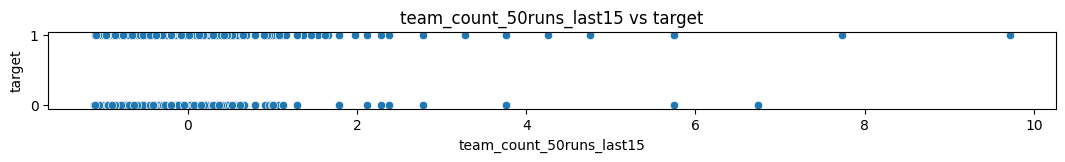

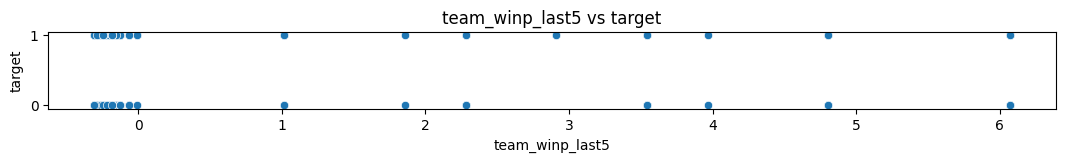

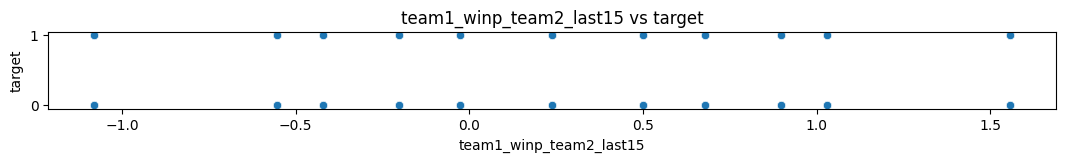

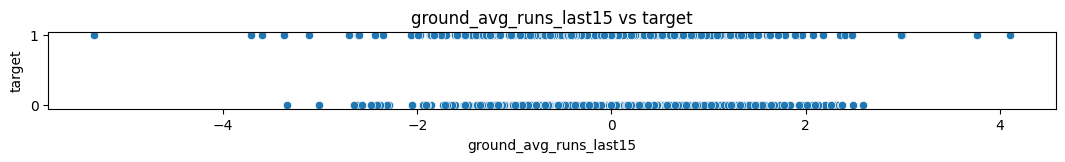

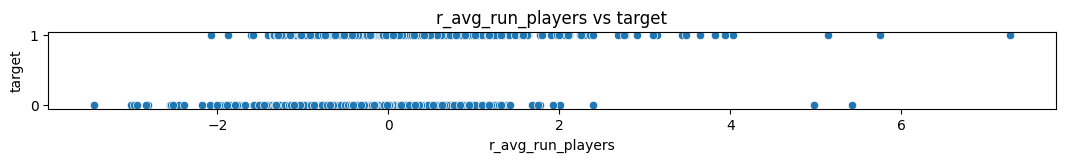

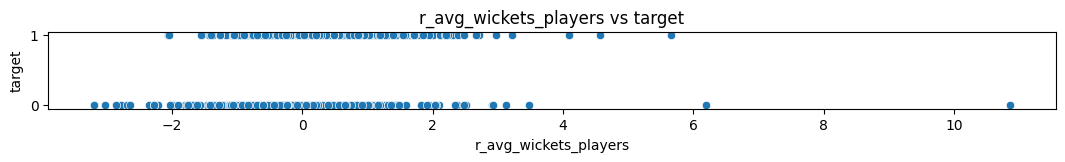

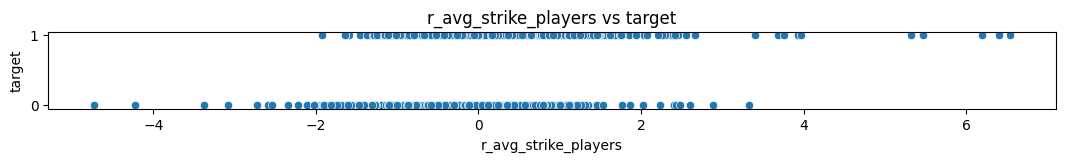

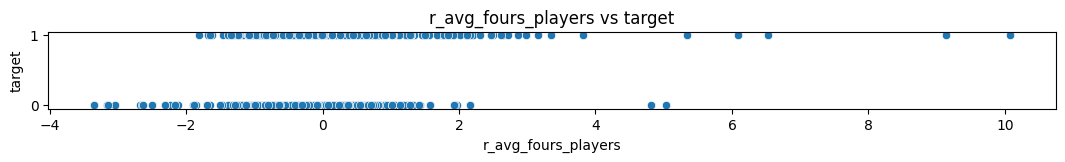

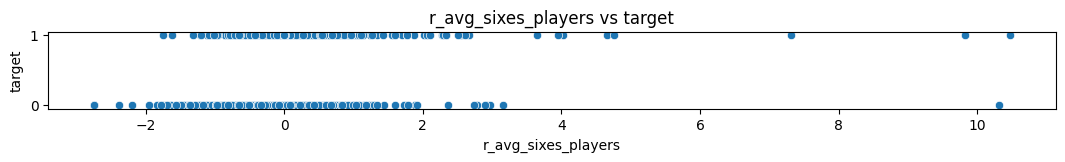

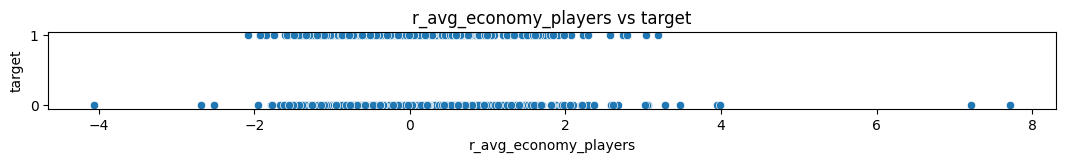

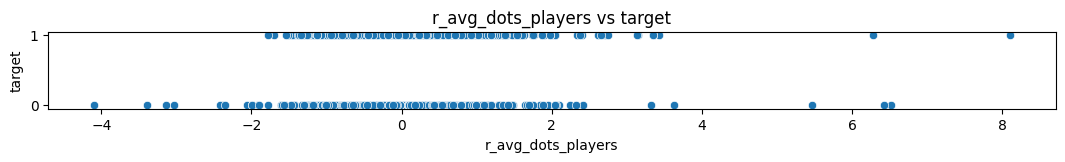

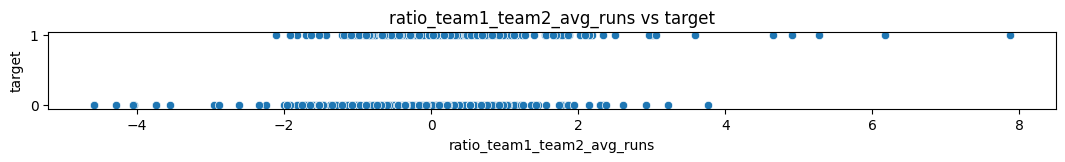

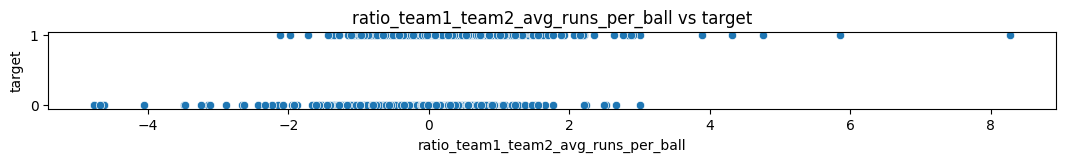

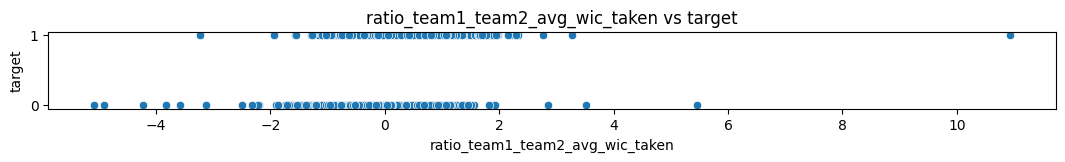

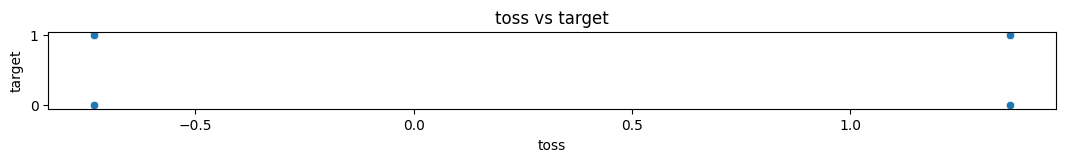

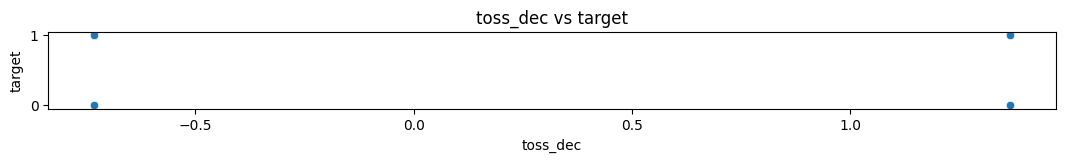

In [ ]:
for feature in continuous_features:
    plt.figure(figsize=(13, 1))
    sns.scatterplot(x=data[feature], y=train_data_all[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


In [ ]:
X_train_all.shape

(948, 14)

In [ ]:
X_test_all.shape

(271, 14)

In [ ]:
X_train_all.columns

Index(['lighting', 'team_count_50runs_last15', 'team_winp_last5',
       'team1_winp_team2_last15', 'ground_avg_runs_last15',
       'r_avg_run_players', 'r_avg_wickets_players', 'r_avg_strike_players',
       'r_avg_fours_players', 'r_avg_sixes_players', 'r_avg_economy_players',
       'r_avg_dots_players', 'ratio_team1_team2_avg_runs',
       'ratio_team1_team2_avg_runs_per_ball',
       'ratio_team1_team2_avg_wic_taken', 'toss', 'toss_dec',
       'team_batting_first'],
      dtype='object')

In [ ]:
'''
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['lighting']:
    X_train_all[col] = label_encoder.fit_transform(X_train_all[col])
    X_test_all[col] = label_encoder.fit_transform(X_test_all[col])

In [ ]:
X_train_all.head(2)

team_count_50runs_last15  team_winp_last5  team1_winp_team2_last15  \
0                  1.666667         0.672131                    100.0   
1                  1.285714         1.952381                     50.0   

   ground_avg_runs_last15  r_avg_run_players  r_avg_wickets_players  \
0              157.178571           0.869260               0.723992   
1              103.500000           1.024794               1.002127   

   r_avg_strike_players  r_avg_fours_players  r_avg_sixes_players  \
0              0.937036             1.006776             1.772727   
1              0.983590             1.182629             0.866996   

   r_avg_economy_players  r_avg_dots_players  ratio_team1_team2_avg_runs  \
0                1.00760            0.829139                    0.999783   
1                0.80708            0.911036                    1.021713   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  
0                             0.974758                         0.975013  
1                             1.044687                         1.023412

In [ ]:
X_test_all.head(2)

team_count_50runs_last15  team_winp_last5  team1_winp_team2_last15  \
0                  0.000000         0.019608                     0.00   
1                  0.615385         0.344262                    66.67   

   ground_avg_runs_last15  r_avg_run_players  r_avg_wickets_players  \
0                     NaN           0.912769               1.541156   
1                   153.5           1.089279               1.140171   

   r_avg_strike_players  r_avg_fours_players  r_avg_sixes_players  \
0              0.730993             1.215902             0.454389   
1              1.125065             1.077794             1.034625   

   r_avg_economy_players  r_avg_dots_players  ratio_team1_team2_avg_runs  \
0               0.690611            1.043352                    0.873606   
1               0.961859            1.075880                    0.968520   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  
0                             1.147642                         1.000000  
1                             1.013115                         1.112696

In [ ]:
# Ensure that only numeric columns are considered
numeric_cols = X_train_all.select_dtypes(include=[np.number]).columns

# Identify columns with infinite values in training and test sets
cols_with_inf_train = numeric_cols[np.isinf(X_train_all[numeric_cols]).any()]
cols_with_inf_test = numeric_cols[np.isinf(X_test_all[numeric_cols]).any()]

print(f'Columns with infinite values in training set: {cols_with_inf_train}')
print(f'Columns with infinite values in test set: {cols_with_inf_test}')

X_train_all.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_all.replace([np.inf, -np.inf], np.nan, inplace=True)

Columns with infinite values in training set: Index(['r_avg_sixes_players'], dtype='object')
Columns with infinite values in test set: Index([], dtype='object')


In [ ]:
X_train_all.fillna(X_train_all.mean(), inplace=True)
X_test_all.fillna(X_test_all.mean(), inplace=True)


In [ ]:
X_test_all.isnull().sum()

lighting                               0
team_count_50runs_last15               0
team_winp_last5                        0
team1_winp_team2_last15                0
ground_avg_runs_last15                 0
r_avg_run_players                      0
r_avg_wickets_players                  0
r_avg_strike_players                   0
r_avg_fours_players                    0
r_avg_sixes_players                    0
r_avg_economy_players                  0
r_avg_dots_players                     0
ratio_team1_team2_avg_runs             0
ratio_team1_team2_avg_runs_per_ball    0
ratio_team1_team2_avg_wic_taken        0
toss                                   0
toss_dec                               0
team_batting_first                     0
dtype: int64

In [ ]:
scaler = StandardScaler()
num_cols = X_train_all.select_dtypes(include=np.number).columns.tolist()
X_train_all[num_cols] = scaler.fit_transform(X_train_all[num_cols])
X_test_all[num_cols] = scaler.transform(X_test_all[num_cols])

In [ ]:
X_train_all.head(2)

team_count_50runs_last15  team_winp_last5  team1_winp_team2_last15  \
0                  0.460263        -0.267326                 1.555768   
1                  0.082431        -0.186458                 0.237509   

   ground_avg_runs_last15  r_avg_run_players  r_avg_wickets_players  \
0                0.247358          -0.743634              -0.966554   
1               -3.708942           0.035457              -0.110162   

   r_avg_strike_players  r_avg_fours_players  r_avg_sixes_players  \
0             -0.448636            -0.060292             1.884436   
1             -0.176411             0.664962            -0.481946   

   r_avg_economy_players  r_avg_dots_players  ratio_team1_team2_avg_runs  \
0              -0.055605           -0.797741                   -0.107773   
1              -0.852817           -0.471706                    0.116585   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  
0                            -0.326232                        -0.177503  
1                             0.435247                         0.103507

In [ ]:
Y_train_all.shape

(948,)

###tasting

In [ ]:
X_train_tej_all = X_train_all
X_test_tej_all = X_test_all

In [ ]:
X_train_all.shape

(948, 15)

In [ ]:
X_train_tej_all.columns

Index(['team_count_50runs_last15', 'team_winp_last5',
       'team1_winp_team2_last15', 'ground_avg_runs_last15',
       'r_avg_run_players', 'r_avg_wickets_players', 'r_avg_strike_players',
       'r_avg_fours_players', 'r_avg_sixes_players', 'r_avg_economy_players',
       'r_avg_dots_players', 'ratio_team1_team2_avg_runs',
       'ratio_team1_team2_avg_runs_per_ball',
       'ratio_team1_team2_avg_wic_taken'],
      dtype='object')

In [ ]:
X_train_all = X_train_tej_all.drop(columns =['team_winp_last5', 'team1_winp_team2_last15', 'ground_avg_runs_last15',
                                             'r_avg_economy_players',
                                      ])
X_test_all = X_test_tej_all.drop(columns =['team_winp_last5', 'team1_winp_team2_last15', 'ground_avg_runs_last15',
                                             'r_avg_economy_players',
                                      ])

#best_model : LGBMClassifier(learning_rate=0.01, max_depth=3, reg_alpha=0.1, reg_lambda=1)
#best_model Accuracy_val: 0.6684210526315789; Accuracy_train: 0.6912928759894459

In [ ]:
X_train_all_1 = X_train_all.drop(columns =[
        'ratio_team1_team2_avg_runs'
       ])
X_test_all_1 = X_test_all.drop(columns =[
        'ratio_team1_team2_avg_runs'
       ])
#66

In [ ]:
X_train_all_1 = X_train_all.drop(columns =[
        'ratio_team1_team2_avg_runs','r_avg_strike_players','r_avg_sixes_players',
        'team_count_50runs_last15'
       ])
X_test_all_1 = X_test_all.drop(columns =[
        'ratio_team1_team2_avg_runs','r_avg_strike_players','r_avg_sixes_players',
        'team_count_50runs_last15',
       ])

In [ ]:
X_train_all_1 = X_train_all.drop(columns =[ 'r_avg_run_players',
        'ratio_team1_team2_avg_runs','r_avg_strike_players','r_avg_sixes_players',
        'team_count_50runs_last15', 'r_avg_dots_players','r_avg_fours_players','r_avg_wickets_players'
       ])
X_test_all_1 = X_test_all.drop(columns =[  'r_avg_run_players',
        'ratio_team1_team2_avg_runs','r_avg_strike_players','r_avg_sixes_players',
        'team_count_50runs_last15', 'r_avg_dots_players','r_avg_fours_players','r_avg_wickets_players'
       ])

In [ ]:
X_train_all.columns

Index(['team_count_50runs_last15', 'r_avg_run_players',
       'r_avg_wickets_players', 'r_avg_strike_players', 'r_avg_fours_players',
       'r_avg_sixes_players', 'r_avg_dots_players',
       'ratio_team1_team2_avg_runs', 'ratio_team1_team2_avg_runs_per_ball',
       'ratio_team1_team2_avg_wic_taken'],
      dtype='object')

In [ ]:
print(X_train_all.shape)
print(X_test_all.shape)

(948, 10)
(271, 10)


In [ ]:
print(X_train_all_1.shape)
print(X_test_all_1.shape)

(948, 3)
(271, 3)


In [ ]:
X_train_all_1.columns

Index(['ratio_team1_team2_avg_runs_per_ball', 'ratio_team1_team2_avg_wic_taken'], dtype='object')

In [ ]:
X_train_1, X_val_1, Y_train_1, Y_val_1 = train_test_split(X_train_all_1, Y_train_all, test_size=0.2, random_state=42)

###Tej


In [ ]:
train_data_tej = train_data
test_data_tej = test_data
match_data_tej = match_data
bats_data_tej = batsman_data
bowler_data_tej = bowler_data

In [ ]:
train_data_tej.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15'],
      dtype='object')

In [ ]:
match_data.columns

Index(['match id', 'team1', 'team2', 'winner', 'by', 'win amount',
       'toss winner', 'toss decision', 'venue', 'city', 'match_dt', 'lighting',
       'series_name', 'season', 'ground_id', 'umpire1', 'umpire2',
       'inning1_runs', 'inning1_wickets', 'inning1_balls', 'inning2_runs',
       'inning2_wickets', 'inning2_balls', 'team1_id', 'team1_roster_ids',
       'team2_id', 'team2_roster_ids', 'series_type', 'winner_id',
       'player_of_the_match_id'],
      dtype='object')

In [ ]:
train_data_tej.head(2)

match id team1  team1_id  \
0   9331181    Ba     11283   
1   8797060    Ed        20   

                                    team1_roster_ids  team2  team2_id  \
0  9373356.0:7857520.0:4232164.0:4566540.0:329940...  Hl Ph     12634   
1  2089079.0:6139370.0:2076192.0:62432.0:2083409....  Wt Is        41   

                                    team2_roster_ids winner  winner_id  \
0  3500958.0:4231751.0:2735081.0:2035102.0:369833...  Hl Ph      12634   
1  4690258.0:4069666.0:4230127.0:1942317.0:161392...     Ed         20   

  toss winner  ...    match_dt         lighting     series_name   season  \
0       Hl Ph  ...  2022-10-20  day/night match     Sd Mq Ai Ty  2022/23   
1       Wt Is  ...  2022-01-23  day/night match  Ed tr of Wt Is  2021/22   

  ground_id team_count_50runs_last15 team_winp_last5  \
0      7398                 1.666667        0.672131   
1      1406                 1.285714        1.952381   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  
0                      139.0                    100.0              157.178571  
1                      156.0                     50.0              103.500000  

[2 rows x 23 columns]

In [ ]:
match_data_tej.columns

Index(['match id', 'team1', 'team2', 'winner', 'by', 'win amount',
       'toss winner', 'toss decision', 'venue', 'city', 'match_dt', 'lighting',
       'series_name', 'season', 'ground_id', 'umpire1', 'umpire2',
       'inning1_runs', 'inning1_wickets', 'inning1_balls', 'inning2_runs',
       'inning2_wickets', 'inning2_balls', 'team1_id', 'team1_roster_ids',
       'team2_id', 'team2_roster_ids', 'series_type', 'winner_id',
       'player_of_the_match_id'],
      dtype='object')

In [ ]:
# Define a function to determine which team bats first
def determine_batting_first(row):
    if row['toss winner'] == row['team1']:
        if row['toss decision'] == 'bat':
            return row['team1_id']
        else:
            return row['team2_id']
    else:
        if row['toss decision'] == 'bat':
            return row['team2_id']
        else:
            return row['team1_id']

# Apply the function and create a new column
match_data_tej['team_batting_first'] = match_data_tej.apply(determine_batting_first, axis=1)

# Define a function to determine which team bats second
def determine_batting_second(row):
    if row['team_batting_first'] == row['team1_id']:
        return row['team2_id']
    else:
        return row['team1_id']

# Apply the function and create a new column
match_data_tej['team_batting_second'] = match_data_tej.apply(determine_batting_second, axis=1)

# Display the updated match data


In [ ]:
match_data_tej.head(2)


match id  team1  team2 winner       by  win amount toss winner  \
0   8638034  Nn Ds     Wn     Wn  wickets         9.0          Wn   
1   8588005  Me Rs  Sy Tr  Sy Tr     runs         7.0       Sy Tr   

  toss decision  venue             city  ... inning2_balls team1_id  \
0         field  By Ol  Mount Maunganui  ...          97.0    17982   
1         field  Ca Ol          Carrara  ...          74.0    33942   

                                    team1_roster_ids team2_id  \
0  7907451.0:4381761.0:31464.0:258649.0:4949790.0...    18570   
1  37351.0:46794.0:5406540.0:2231928.0:181404.0:1...    33963   

                                    team2_roster_ids     series_type  \
0  2653993.0:6718326.0:6718382.0:2486896.0:228878...  other_domestic   
1  1506098.0:1749075.0:36665.0:2083409.0:7534652....  other_domestic   

  winner_id  player_of_the_match_id  team_batting_first  team_batting_second  
0     18570                     NaN               17982                18570  
1     33963               1749075.0               33942                33963  

[2 rows x 32 columns]

In [ ]:
match_data_tej.columns


Index(['match id', 'team1', 'team2', 'winner', 'by', 'win amount',
       'toss winner', 'toss decision', 'venue', 'city', 'match_dt', 'lighting',
       'series_name', 'season', 'ground_id', 'umpire1', 'umpire2',
       'inning1_runs', 'inning1_wickets', 'inning1_balls', 'inning2_runs',
       'inning2_wickets', 'inning2_balls', 'team1_id', 'team1_roster_ids',
       'team2_id', 'team2_roster_ids', 'series_type', 'winner_id',
       'player_of_the_match_id', 'team_batting_first', 'team_batting_second'],
      dtype='object')

In [ ]:
# Initialize a DataFrame to store performance metrics for each team
team_performance = []

# Iterate through the match data to assign scores, wickets, and balls played to the correct teams
for _, row in match_data_tej.iterrows():
    if row['team_batting_first'] == row['team1_id']:
        team_performance.append({'team_id': row['team1_id'], 'score': row['inning1_runs'], 'wickets_taken': row['inning2_wickets'], 'balls_played': row['inning1_balls']})
        team_performance.append({'team_id': row['team2_id'], 'score': row['inning2_runs'], 'wickets_taken': row['inning1_wickets'], 'balls_played': row['inning2_balls']})
    else:
        team_performance.append({'team_id': row['team2_id'], 'score': row['inning1_runs'], 'wickets_taken': row['inning2_wickets'], 'balls_played': row['inning1_balls']})
        team_performance.append({'team_id': row['team1_id'], 'score': row['inning2_runs'], 'wickets_taken': row['inning1_wickets'], 'balls_played': row['inning2_balls']})

# Convert to DataFrame
team_performance_df = pd.DataFrame(team_performance)

# Calculate the average score, wickets taken, and balls played for each team
avg_performance = team_performance_df.groupby('team_id').mean().reset_index()
avg_performance.columns = ['team_id', 'avg_score', 'avg_wickets_taken', 'avg_balls_played']

team_performance = avg_performance



In [ ]:
team_performance.head(2)

team_id   avg_score  avg_wickets_taken  avg_balls_played
0       20  163.148936           6.489362        116.382979
1       27  154.365854           6.756098        114.487805

In [ ]:
team_performance['avg_runs_per_ball'] = team_performance['avg_score'] / team_performance['avg_balls_played']


In [ ]:
'''
# Extract the team1_id and team2_id columns
team1_ids = train_data_tej['team1_id']
team2_ids = train_data_tej['team2_id']

# Combine the two columns into a single list and find unique team IDs
all_team_ids = pd.concat([team1_ids, team2_ids]).unique()

# Determine the number of unique team IDs
num_unique_teams = len(all_team_ids)



In [ ]:
num_unique_teams

162

In [ ]:
team_performance.head(2)

team_id   avg_score  avg_wickets_taken  avg_balls_played  avg_runs_per_ball
0       20  163.148936           6.489362        116.382979           1.401828
1       27  154.365854           6.756098        114.487805           1.348317

In [ ]:
team_performance.shape

(174, 5)

In [ ]:
train_data_tej.head(2)

match id team1  team1_id  \
0   9331181    Ba     11283   
1   8797060    Ed        20   

                                    team1_roster_ids  team2  team2_id  \
0  9373356.0:7857520.0:4232164.0:4566540.0:329940...  Hl Ph     12634   
1  2089079.0:6139370.0:2076192.0:62432.0:2083409....  Wt Is        41   

                                    team2_roster_ids winner  winner_id  \
0  3500958.0:4231751.0:2735081.0:2035102.0:369833...  Hl Ph      12634   
1  4690258.0:4069666.0:4230127.0:1942317.0:161392...     Ed         20   

  toss winner  ...    match_dt         lighting     series_name   season  \
0       Hl Ph  ...  2022-10-20  day/night match     Sd Mq Ai Ty  2022/23   
1       Wt Is  ...  2022-01-23  day/night match  Ed tr of Wt Is  2021/22   

  ground_id team_count_50runs_last15 team_winp_last5  \
0      7398                 1.666667        0.672131   
1      1406                 1.285714        1.952381   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  
0                      139.0                    100.0              157.178571  
1                      156.0                     50.0              103.500000  

[2 rows x 23 columns]

In [ ]:
test_data_tej.head(2)

match id     team1  team1_id  \
0   9250275        Jy     28594   
1   9262189  Ga An Ws     36084   

                                    team1_roster_ids        team2  team2_id  \
0  7438955.0:8271969.0:8369661.0:3685247.0:259025...  Ud Ss of Aa        90   
1  3715690.0:6818622.0:4069666.0:393014.0:4690188...        Ja Ts     36098   

                                    team2_roster_ids  toss winner  \
0  2436944.0:8117500.0:6703528.0:3010748.0:161387...  Ud Ss of Aa   
1  4690258.0:3761246.0:8464385.0:5742470.0:315072...        Ja Ts   

  toss decision     venue  ... avg_balls_played_team1 avg_runs_per_ball_team1  \
0         field  Bo Ac Cb  ...              95.000000                1.484211   
1         field  Pe Sm Ga  ...             118.583333                1.302881   

  avg_score_team2 avg_wickets_taken_team2 avg_balls_played_team2  \
0      161.400000                7.000000             124.800000   
1      159.521739                6.478261             124.043478   

   avg_runs_per_ball_team2  ratio_team1_team2_avg_runs  \
0                 1.293269                    0.873606   
1                 1.286015                    0.968520   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  \
0                             1.147642                         1.000000   
1                             1.013115                         1.112696   

   team_batting_first  
0                   1  
1                   1  

[2 rows x 33 columns]

In [ ]:

# Assuming team_performance contains avg_score, avg_wickets_taken, avg_balls_played, and avg_runs_per_ball
# Merge the average scores, wickets taken, and runs per ball into the train and test datasets
train_data_tej = train_data_tej.merge(team_performance, left_on='team1_id', right_on='team_id', how='left')
test_data_tej = test_data_tej.merge(team_performance, left_on='team1_id', right_on='team_id', how='left')

train_data_tej = train_data_tej.merge(team_performance, left_on='team2_id', right_on='team_id', how='left', suffixes=('_team1', '_team2'))
test_data_tej = test_data_tej.merge(team_performance, left_on='team2_id', right_on='team_id', how='left', suffixes=('_team1', '_team2'))

# Drop the redundant 'team_id' columns
train_data_tej.drop(columns=['team_id_team1', 'team_id_team2'], inplace=True)
test_data_tej.drop(columns=['team_id_team1', 'team_id_team2'], inplace=True)




In [ ]:
train_data_tej.head(2)

match id team1  team1_id  \
0   9331181    Ba     11283   
1   8797060    Ed        20   

                                    team1_roster_ids  team2  team2_id  \
0  9373356.0:7857520.0:4232164.0:4566540.0:329940...  Hl Ph     12634   
1  2089079.0:6139370.0:2076192.0:62432.0:2083409....  Wt Is        41   

                                    team2_roster_ids winner  winner_id  \
0  3500958.0:4231751.0:2735081.0:2035102.0:369833...  Hl Ph      12634   
1  4690258.0:4069666.0:4230127.0:1942317.0:161392...     Ed         20   

  toss winner  ... team1_winp_team2_last15 ground_avg_runs_last15  \
0       Hl Ph  ...                   100.0             157.178571   
1       Wt Is  ...                    50.0             103.500000   

  avg_score_team1 avg_wickets_taken_team1 avg_balls_played_team1  \
0      138.684211                6.894737             117.000000   
1      163.148936                6.489362             116.382979   

  avg_runs_per_ball_team1 avg_score_team2  avg_wickets_taken_team2  \
0                1.185335      138.714286                 7.071429   
1                1.401828      159.681818                 6.340909   

   avg_balls_played_team2  avg_runs_per_ball_team2  
0              114.071429                 1.216030  
1              119.000000                 1.341864  

[2 rows x 31 columns]

In [ ]:
test_data_tej.head(2)

match id     team1  team1_id  \
0   9250275        Jy     28594   
1   9262189  Ga An Ws     36084   

                                    team1_roster_ids        team2  team2_id  \
0  7438955.0:8271969.0:8369661.0:3685247.0:259025...  Ud Ss of Aa        90   
1  3715690.0:6818622.0:4069666.0:393014.0:4690188...        Ja Ts     36098   

                                    team2_roster_ids  toss winner  \
0  2436944.0:8117500.0:6703528.0:3010748.0:161387...  Ud Ss of Aa   
1  4690258.0:3761246.0:8464385.0:5742470.0:315072...        Ja Ts   

  toss decision     venue  ... team1_winp_team2_last15 ground_avg_runs_last15  \
0         field  Bo Ac Cb  ...                    0.00                    NaN   
1         field  Pe Sm Ga  ...                   66.67                  153.5   

  avg_score_team1 avg_wickets_taken_team1 avg_balls_played_team1  \
0           141.0                7.000000              95.000000   
1           154.5                7.208333             118.583333   

   avg_runs_per_ball_team1  avg_score_team2  avg_wickets_taken_team2  \
0                 1.484211       161.400000                 7.000000   
1                 1.302881       159.521739                 6.478261   

   avg_balls_played_team2  avg_runs_per_ball_team2  
0              124.800000                 1.293269  
1              124.043478                 1.286015  

[2 rows x 29 columns]

In [ ]:
train_data_tej.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'avg_score_team1', 'avg_wickets_taken_team1',
       'avg_balls_played_team1', 'avg_runs_per_ball_team1', 'avg_score_team2',
       'avg_wickets_taken_team2', 'avg_balls_played_team2',
       'avg_runs_per_ball_team2'],
      dtype='object')

In [ ]:
train_data_tej['ratio_team1_team2_avg_runs'] = train_data_tej['avg_score_team1'] / train_data_tej['avg_score_team2']
test_data_tej['ratio_team1_team2_avg_runs'] = test_data_tej['avg_score_team1'] / test_data_tej['avg_score_team2']

# Calculate the ratio of average runs per ball
train_data_tej['ratio_team1_team2_avg_runs_per_ball'] = train_data_tej['avg_runs_per_ball_team1'] / train_data_tej['avg_runs_per_ball_team2']
test_data_tej['ratio_team1_team2_avg_runs_per_ball'] = test_data_tej['avg_runs_per_ball_team1'] / test_data_tej['avg_runs_per_ball_team2']

train_data_tej['ratio_team1_team2_avg_wic_taken'] = train_data_tej['avg_wickets_taken_team1'] / train_data_tej['avg_wickets_taken_team2']
test_data_tej['ratio_team1_team2_avg_wic_taken'] = test_data_tej['avg_wickets_taken_team1'] / test_data_tej['avg_wickets_taken_team2']


In [ ]:
train_data_tej.head(2)

match id team1  team1_id  \
0   9331181    Ba     11283   
1   8797060    Ed        20   

                                    team1_roster_ids  team2  team2_id  \
0  9373356.0:7857520.0:4232164.0:4566540.0:329940...  Hl Ph     12634   
1  2089079.0:6139370.0:2076192.0:62432.0:2083409....  Wt Is        41   

                                    team2_roster_ids winner  winner_id  \
0  3500958.0:4231751.0:2735081.0:2035102.0:369833...  Hl Ph      12634   
1  4690258.0:4069666.0:4230127.0:1942317.0:161392...     Ed         20   

  toss winner  ... avg_wickets_taken_team1 avg_balls_played_team1  \
0       Hl Ph  ...                6.894737             117.000000   
1       Wt Is  ...                6.489362             116.382979   

  avg_runs_per_ball_team1 avg_score_team2 avg_wickets_taken_team2  \
0                1.185335      138.714286                7.071429   
1                1.401828      159.681818                6.340909   

  avg_balls_played_team2 avg_runs_per_ball_team2  ratio_team1_team2_avg_runs  \
0             114.071429                1.216030                    0.999783   
1             119.000000                1.341864                    1.021713   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  
0                             0.974758                         0.975013  
1                             1.044687                         1.023412  

[2 rows x 34 columns]

In [ ]:
train_data_tej['target'] = np.where(train_data_tej['winner_id'] == train_data_tej['team1_id'], 1, 0)

In [ ]:
#train_data_tej['batting_first_'] = np.where(train_data_tej['batting_first'] == train_data_tej['team1_id'], 1, 0)

In [ ]:
train_data_tej.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'avg_score_team1', 'avg_wickets_taken_team1',
       'avg_balls_played_team1', 'avg_runs_per_ball_team1', 'avg_score_team2',
       'avg_wickets_taken_team2', 'avg_balls_played_team2',
       'avg_runs_per_ball_team2', 'ratio_team1_team2_avg_runs',
       'ratio_team1_team2_avg_runs_per_ball',
       'ratio_team1_team2_avg_wic_taken', 'target'],
      dtype='object')

In [ ]:
# Define a function to determine which team bats first
#if team1 batting first is team1 then batting first is 1, else 0;
def determine_batting_first(row):
    if row['toss winner'] == row['team1']:
        if row['toss decision'] == 'bat':
            return '1'
        else:
            return '2'
    else:
        if row['toss decision'] == 'bat':
            return '2'
        else:
            return '1'

# Apply the function and create a new column
train_data_tej['team_batting_first'] = train_data_tej.apply(determine_batting_first, axis=1)
test_data_tej['team_batting_first'] = test_data_tej.apply(determine_batting_first, axis=1)



In [ ]:
'''
# Define a function to determine which team bats second
def determine_batting_second(row):
    if row['team_batting_first'] == row['team1_id']:
        return row['team2_id']
    else:
        return row['team1_id']

# Apply the function and create a new column
train_data_tej['team_batting_second'] = train_data_tej.apply(determine_batting_second, axis=1)
test_data_tej['team_batting_second'] = test_data_tej.apply(determine_batting_second, axis=1)

# Display the updated match data
'''

In [ ]:
'''
train_data_tej = train_data_tej.drop(columns = ['team_batting_first'])
test_data_tej = test_data_tej.drop(columns = ['team_batting_first'])

In [ ]:
train_data_tej.head(2)

match id team1  team1_id  \
0   9331181    Ba     11283   
1   8797060    Ed        20   

                                    team1_roster_ids  team2  team2_id  \
0  9373356.0:7857520.0:4232164.0:4566540.0:329940...  Hl Ph     12634   
1  2089079.0:6139370.0:2076192.0:62432.0:2083409....  Wt Is        41   

                                    team2_roster_ids winner  winner_id  \
0  3500958.0:4231751.0:2735081.0:2035102.0:369833...  Hl Ph      12634   
1  4690258.0:4069666.0:4230127.0:1942317.0:161392...     Ed         20   

  toss winner  ... avg_runs_per_ball_team1 avg_score_team2  \
0       Hl Ph  ...                1.185335      138.714286   
1       Wt Is  ...                1.401828      159.681818   

  avg_wickets_taken_team2 avg_balls_played_team2 avg_runs_per_ball_team2  \
0                7.071429             114.071429                1.216030   
1                6.340909             119.000000                1.341864   

  ratio_team1_team2_avg_runs ratio_team1_team2_avg_runs_per_ball  \
0                   0.999783                            0.974758   
1                   1.021713                            1.044687   

   ratio_team1_team2_avg_wic_taken  target  team_batting_first  
0                         0.975013       0                   1  
1                         1.023412       1                   1  

[2 rows x 36 columns]

In [ ]:
train_data_tej.columns

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'lighting', 'series_name',
       'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'avg_score_team1', 'avg_wickets_taken_team1',
       'avg_balls_played_team1', 'avg_runs_per_ball_team1', 'avg_score_team2',
       'avg_wickets_taken_team2', 'avg_balls_played_team2',
       'avg_runs_per_ball_team2', 'ratio_team1_team2_avg_runs',
       'ratio_team1_team2_avg_runs_per_ball',
       'ratio_team1_team2_avg_wic_taken', 'target', 'team_batting_first'],
      dtype='object')

In [ ]:
X_tej = train_data_tej.drop(columns=['match id','team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'winner', 'winner_id', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'series_name',
       'season', 'team_batting_first','team1only_avg_runs_last15',
        'avg_score_team1',
       'avg_balls_played_team1', 'avg_score_team2',
        'avg_balls_played_team2',
        'target', 'ground_id', 'team_batting_first'])


In [ ]:
Y_tej = train_data_tej['target']

In [ ]:
X_test_tej = test_data_tej.drop(columns=['match id','team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'toss winner',
       'toss decision', 'venue', 'city', 'match_dt', 'series_name',
       'season', 'team_batting_first','team1only_avg_runs_last15',
        'avg_score_team1',
       'avg_balls_played_team1', 'avg_runs_per_ball_team1', 'avg_score_team2',
      'avg_balls_played_team2',
       'avg_runs_per_ball_team2', 'ground_id', 'team_batting_first'])

In [ ]:
X_test_tej.head(2)

lighting  team_count_50runs_last15  team_winp_last5  \
0    day match                  0.000000         0.019608   
1  night match                  0.615385         0.344262   

   team1_winp_team2_last15  ground_avg_runs_last15  \
0                     0.00                     NaN   
1                    66.67                   153.5   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  
0                             1.147642                         1.000000  
1                             1.013115                         1.112696

In [ ]:
X_tej.shape

(948, 9)

In [ ]:
X_test_tej.shape

(271, 9)

In [ ]:

# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['lighting']:
    X_tej[col] = label_encoder.fit_transform(X_tej[col])
    X_test_tej[col] = label_encoder.fit_transform(X_test_tej[col])


In [ ]:
X_tej.head(2)

lighting  team_count_50runs_last15  team_winp_last5  \
0  day/night match                  1.666667         0.672131   
1  day/night match                  1.285714         1.952381   

   team1only_avg_runs_last15  team1_winp_team2_last15  ground_avg_runs_last15  \
0                      139.0                    100.0              157.178571   
1                      156.0                     50.0              103.500000   

   ratio_team1_team2_avg_runs  ratio_team1_team2_avg_runs_per_ball  \
0                    0.999783                             0.974758   
1                    1.021713                             1.044687   

   ratio_team1_team2_avg_wic_taken  
0                         0.975013  
1                         1.023412

In [ ]:
X_test_tej.head(2)

team_count_50runs_last15  team_winp_last5  team1_winp_team2_last15  \
0                  0.000000         0.019608                     0.00   
1                  0.615385         0.344262                    66.67   

   ground_avg_runs_last15  ratio_team1_team2_avg_runs_per_ball  \
0                     NaN                             1.147642   
1                   153.5                             1.013115   

   ratio_team1_team2_avg_wic_taken  
0                         1.000000  
1                         1.112696

In [ ]:
'''
all_teams = pd.concat([train_data_tej['team1_id'], train_data_tej['team2_id'],
                       test_data_tej['team1_id'], test_data_tej['team2_id']]).unique()


In [ ]:
'''
all_teams = pd.concat([X_tej['team_batting_first'], X_tej['team_batting_second'],
                       X_test_tej['team_batting_first'], X_test_tej['team_batting_second']]).unique()


In [ ]:
#all_teams.shape

(164,)

In [ ]:
'''
team_encoder = LabelEncoder()
team_encoder.fit(all_teams)

LabelEncoder()

In [ ]:
'''
for col in ['team_batting_first','team_batting_second']:
    X_tej[col] = team_encoder.transform(X_tej[col])
for col in ['team_batting_first', 'team_batting_second']:
    X_test_tej[col] = team_encoder.transform(X_test_tej[col])

In [ ]:
X_test_tej.head(2)

lighting  team_count_50runs_last15  team_winp_last5  \
0         0                  0.000000         0.019608   
1         2                  0.615385         0.344262   

   team1_winp_team2_last15  ground_avg_runs_last15  \
0                     0.00                     NaN   
1                    66.67                   153.5   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  
0                             1.147642                         1.000000  
1                             1.013115                         1.112696

In [ ]:
X_tej.isna().sum()

team_count_50runs_last15                0
team_winp_last5                         0
team1_winp_team2_last15                 0
ground_avg_runs_last15                 53
ratio_team1_team2_avg_runs_per_ball     0
ratio_team1_team2_avg_wic_taken         0
dtype: int64

In [ ]:
X_test_tej.isna().sum()

team_count_50runs_last15                0
team_winp_last5                         0
team1_winp_team2_last15                 0
ground_avg_runs_last15                 10
ratio_team1_team2_avg_runs_per_ball     1
ratio_team1_team2_avg_wic_taken         1
dtype: int64

In [ ]:
X_tej.fillna(X_tej.mean(), inplace=True)

X_test_tej.fillna(X_test_tej.mean(), inplace=True)

TypeError: Could not convert ['day/night matchday/night matchday/night matchday matchnight matchnight matchnight matchday matchday/night matchday matchnight matchnight matchnight matchday/night matchday/night matchnight matchnight matchday/night matchday/night matchday matchnight matchday/night matchnight matchnight matchday matchday/night matchday/night matchnight matchnight matchday matchnight matchnight matchnight matchnight matchday/night matchday matchnight matchday/night matchday matchnight matchday matchnight matchday/night matchday/night matchnight matchnight matchday matchday/night matchnight matchnight matchday/night matchday/night matchday/night matchnight matchday matchnight matchday matchday/night matchnight matchday matchday matchday matchnight matchday/night matchday matchday matchnight matchday matchday/night matchnight matchday/night matchday/night matchnight matchday matchday/night matchnight matchnight matchday/night matchnight matchday matchday matchday matchday/night matchday matchnight matchnight matchday/night matchday/night matchday/night matchday matchnight matchday matchnight matchnight matchday matchnight matchnight matchday matchnight matchnight matchnight matchday matchnight matchnight matchday matchday/night matchday/night matchday/night matchday/night matchnight matchday matchday/night matchnight matchnight matchday matchday matchday/night matchday matchnight matchnight matchnight matchday matchnight matchnight matchnight matchnight matchday matchnight matchnight matchday matchday/night matchday matchnight matchday/night matchday/night matchnight matchday/night matchnight matchday/night matchnight matchday matchnight matchday matchnight matchday/night matchday/night matchday matchday matchnight matchnight matchday matchnight matchnight matchday/night matchday/night matchnight matchnight matchday/night matchday matchday matchday/night matchday/night matchnight matchnight matchday/night matchday matchnight matchnight matchday matchnight matchday/night matchday/night matchday/night matchday/night matchday/night matchnight matchday matchday matchday matchday matchnight matchnight matchday matchday/night matchnight matchnight matchday matchday matchnight matchnight matchday/night matchday matchnight matchday matchnight matchnight matchday/night matchday/night matchnight matchnight matchnight matchday/night matchday/night matchday matchnight matchnight matchday matchday matchnight matchday matchday matchnight matchday matchnight matchnight matchday matchday/night matchnight matchday/night matchnight matchday/night matchday matchday/night matchnight matchnight matchday/night matchday matchnight matchnight matchday matchday matchday/night matchday/night matchday matchday matchday matchday matchday matchday matchday matchday/night matchday/night matchnight matchday matchnight matchday/night matchday matchnight matchday matchnight matchnight matchnight matchday matchday/night matchday/night matchday/night matchday/night matchnight matchnight matchday matchnight matchday matchnight matchday matchday matchday matchnight matchnight matchday matchnight matchday/night matchnight matchday/night matchnight matchday/night matchday matchnight matchday matchday/night matchnight matchnight matchday matchday/night matchday/night matchday matchday/night matchnight matchnight matchnight matchday matchday matchnight matchday matchday matchday/night matchday/night matchday/night matchday matchday/night matchday/night matchday/night matchday/night matchnight matchnight matchday matchnight matchnight matchnight matchnight matchnight matchnight matchnight matchnight matchday/night matchday matchday/night matchnight matchday matchnight matchday matchnight matchnight matchday/night matchday matchnight matchday/night matchday matchday/night matchnight matchday matchnight matchday/night matchnight matchday matchnight matchnight matchnight matchday/night matchday/night matchday matchday/night matchday/night matchday/night matchday matchnight matchday matchnight matchday matchday matchday matchday matchday matchday/night matchnight matchnight matchday/night matchnight matchnight matchday matchnight matchday matchday matchnight matchday matchnight matchday matchnight matchday matchday/night matchday matchnight matchnight matchday/night matchnight matchday matchnight matchday matchnight matchnight matchday matchday matchday/night matchnight matchday/night matchnight matchnight matchday matchday matchnight matchday/night matchnight matchday matchnight matchnight matchday matchday/night matchnight matchday matchday matchnight matchday/night matchnight matchnight matchday matchnight matchday matchnight matchday matchnight matchnight matchday/night matchnight matchday/night matchday/night matchday matchday matchday/night matchday matchday/night matchday/night matchday/night matchnight matchday matchday matchnight matchday/night matchday matchnight matchday matchnight matchday matchnight matchnight matchday/night matchnight matchday/night matchday/night matchday matchnight matchday matchnight matchday matchday/night matchday matchday matchnight matchday matchnight matchday matchday matchday/night matchnight matchday matchday/night matchday/night matchnight matchday matchnight matchday matchday/night matchday matchnight matchday/night matchday matchnight matchnight matchday matchnight matchday matchday matchnight matchnight matchnight matchnight matchnight matchday matchnight matchday/night matchday/night matchday matchnight matchday matchday/night matchday/night matchnight matchday matchday matchday matchday/night matchnight matchnight matchnight matchnight matchday matchday/night matchnight matchday matchnight matchnight matchnight matchday/night matchday matchnight matchnight matchnight matchday/night matchday matchday matchday/night matchday/night matchday matchday matchday matchnight matchday matchday matchnight matchday matchnight matchnight matchday/night matchday matchnight matchnight matchday/night matchday/night matchday matchday matchday/night matchnight matchnight matchday matchnight matchday/night matchday/night matchnight matchnight matchday/night matchday/night matchday matchday matchnight matchday matchnight matchday/night matchnight matchday matchnight matchday matchnight matchnight matchday/night matchday/night matchnight matchnight matchnight matchnight matchnight matchnight matchday matchday matchday matchnight matchday/night matchday matchday matchnight matchnight matchday matchday matchday matchday matchnight matchnight matchnight matchday matchday matchday matchday/night matchday matchnight matchday/night matchday/night matchnight matchnight matchday matchday matchday matchnight matchnight matchnight matchday matchday matchday matchnight matchday/night matchday/night matchday matchday/night matchnight matchday matchday/night matchday matchnight matchnight matchday/night matchday/night matchday matchday/night matchnight matchday/night matchday/night matchday matchday matchnight matchday/night matchday/night matchday/night matchnight matchday/night matchnight matchday/night matchday matchnight matchday matchnight matchnight matchnight matchday/night matchday matchnight matchday matchday matchday/night matchday matchday matchday/night matchday matchnight matchday matchnight matchnight matchday/night matchnight matchday/night matchnight matchday/night matchnight matchday/night matchday/night matchday/night matchday matchnight matchday/night matchday/night matchday matchday/night matchday/night matchnight matchnight matchnight matchnight matchday/night matchday/night matchnight matchday matchnight matchnight matchnight matchnight matchnight matchnight matchday/night matchnight matchday matchday matchnight matchnight matchnight matchnight matchday matchday matchday matchday matchday matchnight matchnight matchday/night matchnight matchday/night matchday matchnight matchnight matchday matchnight matchnight matchday matchday/night matchnight matchnight matchday matchnight matchnight matchday matchnight matchnight matchday matchday/night matchday matchnight matchnight matchnight matchday/night matchday matchday matchnight matchnight matchday matchday matchnight matchday/night matchday matchday/night matchday matchday matchday/night matchday/night matchnight matchnight matchday matchday/night matchday matchnight matchday matchnight matchnight matchday matchday/night matchday/night matchnight matchnight matchday matchday/night matchday/night matchnight matchday matchnight matchday matchnight matchnight matchday matchnight matchday/night matchday/night matchnight matchnight matchnight matchday/night matchnight matchday matchday matchnight matchnight matchnight matchnight matchday/night matchnight matchday matchday/night matchnight matchnight matchnight matchnight matchday/night matchday matchnight matchday matchnight matchnight matchday matchday matchday/night matchday matchday matchday/night matchday matchday matchday/night matchday/night matchday/night matchnight matchday/night matchday matchday/night matchnight matchnight matchnight matchnight matchnight matchday/night matchday matchday/night matchday matchnight matchnight matchnight matchday/night matchday matchday matchday matchnight matchnight matchnight matchday matchday matchday/night matchday/night matchday matchnight matchday matchday matchnight matchnight matchday/night matchday/night matchnight matchnight matchday/night matchnight matchnight matchnight matchday/night matchnight matchnight matchnight matchnight matchday matchday matchnight matchday/night matchnight matchday matchday/night matchday matchday/night matchnight matchday matchnight matchnight matchnight matchday matchnight matchnight matchday/night matchday matchday matchnight matchnight matchday/night matchnight matchnight matchnight matchnight matchday/night matchnight matchday matchday matchday matchnight matchday/night matchnight matchnight matchday matchnight matchday matchday matchday matchnight matchday matchnight matchday/night matchnight matchday matchday matchnight matchday/night matchday matchday matchnight matchday matchnight matchday matchnight matchday matchday matchnight matchday/night matchnight matchnight matchday matchday/night matchday matchnight matchday/night matchday matchnight matchday/night matchday/night matchnight matchday matchday matchday/night matchday matchnight matchnight matchday matchnight matchday matchday/night matchday/night matchday/night matchday matchday/night matchnight matchday matchnight matchday/night matchday/night matchnight matchday/night matchday matchday/night matchday matchnight matchnight matchday/night matchday matchday matchnight matchnight matchday matchday/night matchnight matchnight matchday/night matchday matchnight matchday/night match'] to numeric

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = X_tej

# Assuming your target variable is named 'target'
target = 'target'
features = X_tej.columns


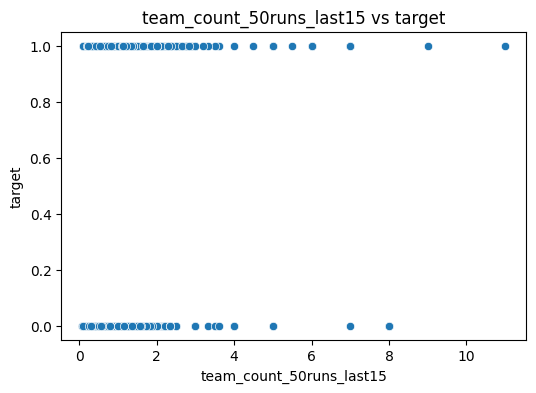

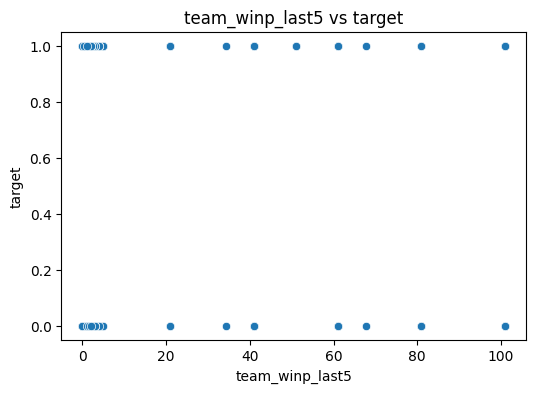

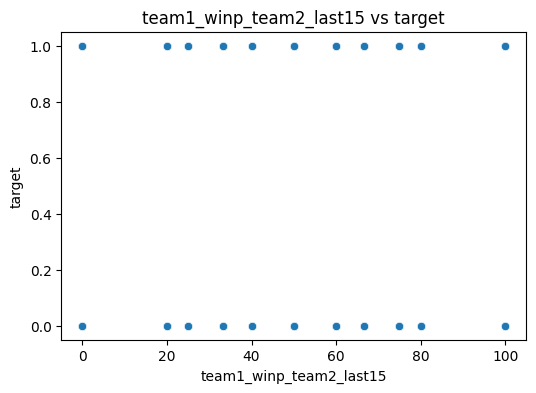

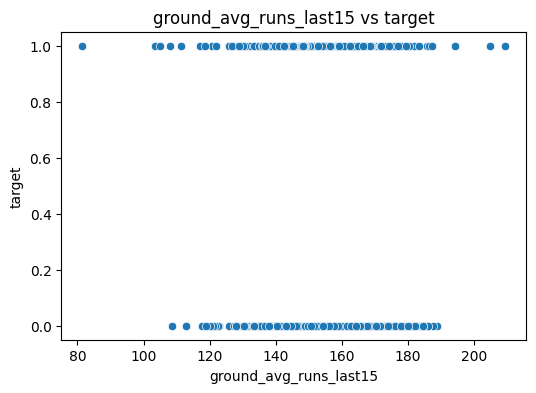

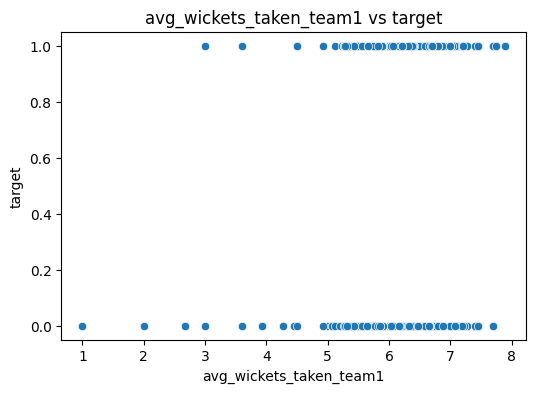

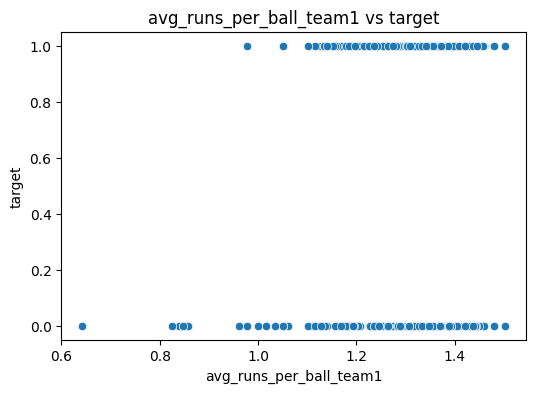

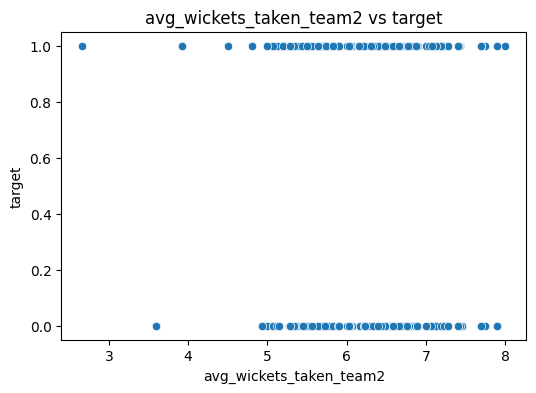

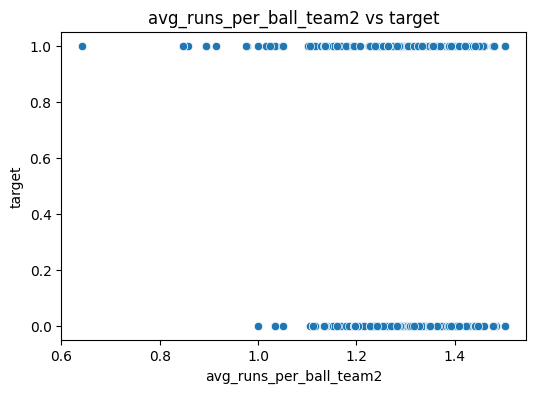

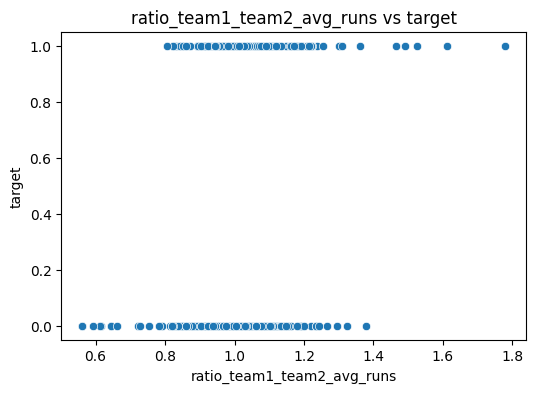

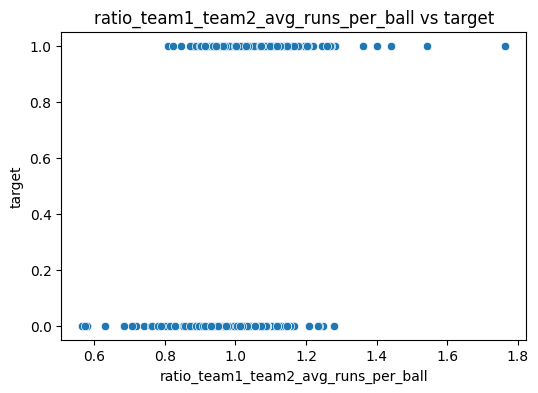

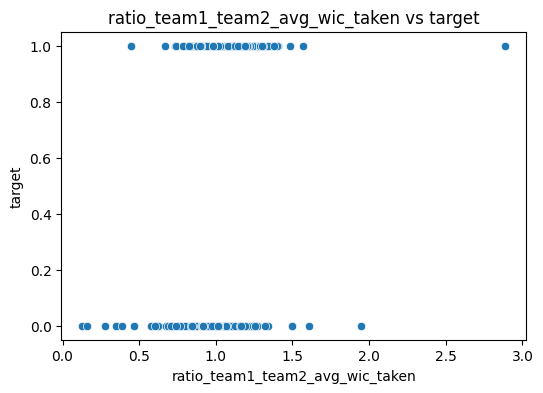

In [ ]:
continuous_features = data[features].select_dtypes(include=['float64', 'int64']).columns
categorical_features = data[features].select_dtypes(include=['object', 'category']).columns


for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=train_data_tej[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


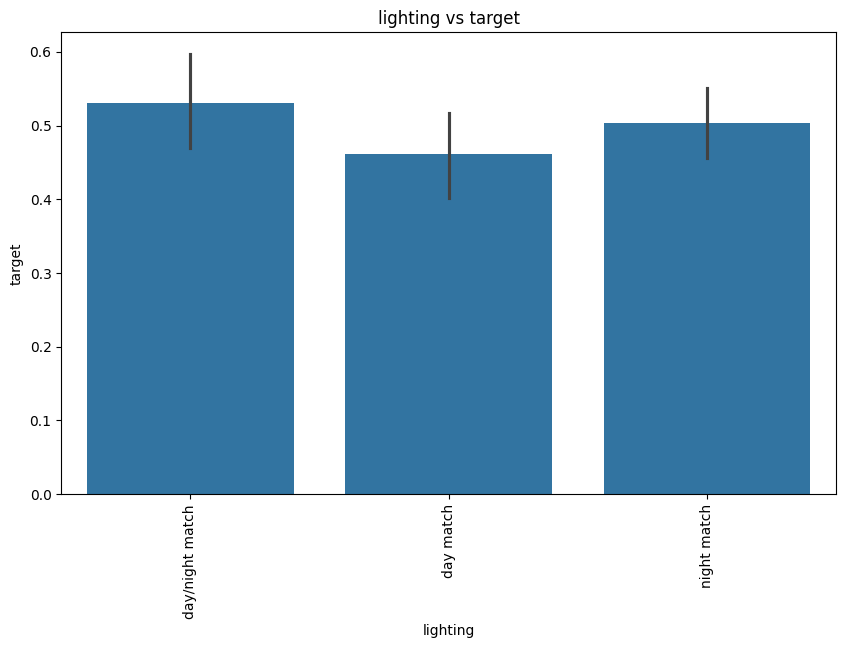

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=X_tej[feature], y=train_data_tej[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.show()


In [ ]:
scaler = StandardScaler()
num_cols = X_tej.select_dtypes(include=np.number).columns.tolist()
X_tej[num_cols] = scaler.fit_transform(X_tej[num_cols])
X_test_tej[num_cols] = scaler.transform(X_test_tej[num_cols])

In [ ]:
X_tej.isna().sum()

lighting                           0
ground_id                          0
team_count_50runs_last15           0
team_winp_last5                    0
team1_winp_team2_last15            0
ground_avg_runs_last15             0
ratio_team1_team2_avg_runs         0
ratio_team1_team2_avg_wic_taken    0
team_batting_first                 0
dtype: int64

In [ ]:
X_test_tej.isna().sum()

lighting                           0
ground_id                          0
team_count_50runs_last15           0
team_winp_last5                    0
team1_winp_team2_last15            0
ground_avg_runs_last15             0
ratio_team1_team2_avg_runs         0
ratio_team1_team2_avg_wic_taken    0
team_batting_first                 0
dtype: int64

In [ ]:
X_test_tej.head(2)

lighting  team_count_50runs_last15  team_winp_last5  \
0 -1.281682                 -1.192749        -0.308544   
1  1.052679                 -0.582407        -0.288036   

   team1_winp_team2_last15  ground_avg_runs_last15  \
0                -1.080750                0.034714   
1                 0.677017               -0.023765   

   ratio_team1_team2_avg_runs_per_ball  ratio_team1_team2_avg_wic_taken  
0                             1.556356                        -0.032426  
1                             0.091452                         0.621903

0.0

In [ ]:
## batting first, batting second
'''
Best Model: XGBClassifier
Best Accuracy: 0.6526315789473685
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

## batting first, batting second, grd id

XGBoost Accuracy: 0.6526315789473685

In [ ]:
#X_test_tej_1 = X_test_tej.drop(columns=['ratio_team1_team2_avg_wic_taken']);

In [ ]:
#X_tej_1 = X_tej.drop(columns=['ratio_team1_team2_avg_wic_taken']);

###model

In [ ]:
#X_train_tej, X_val_tej, Y_train_tej, Y_val_tej = train_test_split(X_tej, Y_tej, test_size=0.2, random_state=42)

In [ ]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.007526797392964498, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=240, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
best_model.fit(X_train_1, Y_train_1)
best_model_pred = best_model.predict(X_val_1)
best_model_acc = accuracy_score(Y_val_1, best_model_pred)

best_model_pred1 = best_model.predict(X_train_1)
best_model_acc1 = accuracy_score(Y_train_1, best_model_pred1)
print(f'best_model : {best_model}')
print(f'best_model Accuracy_val: {best_model_acc}; Accuracy_train: {best_model_acc1} ')



best_model : <catboost.core.CatBoostClassifier object at 0x7e2caee66320>
best_model Accuracy_val: 0.6736842105263158; Accuracy_train: 0.6319261213720316 


In [ ]:
best_model_1.fit(X_train_combined, Y_train_1)
best_model_pred = best_model_1.predict(X_val_combined)
best_model_acc = accuracy_score(Y_val_1, best_model_pred)

best_model_pred1 = best_model_1.predict(X_train_all_combined)
best_model_acc1 = accuracy_score(Y_train_all, best_model_pred1)

print(f'best_model : {best_model}')
print(f'best_model Accuracy_val: {best_model_acc}; Accuracy_train: {best_model_acc1} ')

best_model : <catboost.core.CatBoostClassifier object at 0x793771f905b0>
best_model Accuracy_val: 0.6421052631578947; Accuracy_train: 0.8924050632911392 


###model_grid_search

In [ ]:
X_train_all_1.columns

Index(['ground_avg_runs_last15', 'r_avg_run_players', 'r_avg_wickets_players',
       'r_avg_sixes_players', 'r_avg_economy_players', 'r_avg_dots_players',
       'ratio_team1_team2_avg_runs_per_ball',
       'ratio_team1_team2_avg_wic_taken'],
      dtype='object')

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Define the model type
    model_type = trial.suggest_categorical('model_type', ['lgbm', 'xgb', 'catboost', 'gb'])

    if model_type == 'lgbm':
        params = {
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 1.0),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 1.0),
            'num_leaves': trial.suggest_int('num_leaves', 31, 127)
        }
        model = LGBMClassifier(**params)

    elif model_type == 'xgb':
        params = {
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 1.0),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 1.0)
        }
        model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')

    elif model_type == 'catboost':
        params = {
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
            'depth': trial.suggest_int('depth', 3, 10),
            'iterations': trial.suggest_int('iterations', 100, 500),
            'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
        }
        model = CatBoostClassifier(**params, silent=True)

    elif model_type == 'gb':
        params = {
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'n_estimators': trial.suggest_int('n_estimators', 100, 500)
        }
        model = GradientBoostingClassifier(**params)

    # Perform cross-validation
    scores = cross_val_score(model, X_train_1, Y_train_1, cv=5, scoring='accuracy')
    val_accuracy = scores.mean()

    return val_accuracy

# Create an Optuna study and optimize the objective function with more trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)  # Increase the number of trials to 300

# Print the best hyperparameters and model
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation accuracy: {study.best_value}")

# Train the best model with the best hyperparameters
best_params = study.best_params
model_type = best_params.pop('model_type')

if model_type == 'lgbm':
    best_model = LGBMClassifier(**best_params)
elif model_type == 'xgb':
    best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
elif model_type == 'catboost':
    best_model = CatBoostClassifier(**best_params, silent=True)
elif model_type == 'gb':
    best_model = GradientBoostingClassifier(**best_params)

best_model.fit(X_train_1, Y_train_1)

# Evaluate the best model
train_predictions = best_model.predict(X_train_1)
val_predictions = best_model.predict(X_val_1)

train_accuracy = accuracy_score(Y_train_1, train_predictions)
val_accuracy = accuracy_score(Y_val_1, val_predictions)

print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')


[I 2024-06-15 19:22:29,456] A new study created in memory with name: no-name-8f7d08e5-eaef-457f-aab9-e5a9b2101078
<ipython-input-182-013fd21f71a8>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 1.0),
<ipython-input-182-013fd21f71a8>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': tria

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:22:31,492] Trial 1 finished with value: 0.5540170791216452 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.0033482804688005127, 'max_depth': 10, 'n_estimators': 308, 'reg_alpha': 0.010171918536036016, 'reg_lambda': 0.004137702860255921, 'num_leaves': 89}. Best is trial 1 with value: 0.5540170791216452.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:22:34,644] Trial 2 finished with value: 0.5685779017079122 and parameters: {'model_type': 'catboost', 'learning_rate': 0.010341185977095657, 'depth': 6, 'iterations': 436, 'l2_leaf_reg': 0.001922844425257942}. Best is trial 2 with value: 0.5685779017079122.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:22:43,416] Trial 6 finished with value: 0.552692575810387 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.0014254075121183398, 'max_depth': 6, 'n_estimators': 341, 'reg_alpha': 0.03446760848037608, 'reg_lambda': 0.0014950572387572153, 'num_leaves': 74}. Best is trial 3 with value: 0.580402579295922.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:22:45,378] Trial 7 finished with value: 0.5422185430463576 and parameters: {'model_type': 'catboost', 'learning_rate': 0.047313033434359074, 'depth': 7, 'iterations': 253, 'l2_leaf_reg': 0.0013618311039022024}. Best is trial 3 with value: 0.580402579295922.
<ipython-input-182-013fd21f71a8>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:23:10,645] Trial 20 finished with value: 0.5566138027187173 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.008016981248346735, 'max_depth': 8, 'n_estimators': 100, 'reg_alpha': 0.0012718386578397603, 'reg_lambda': 0.7820113219137861, 'num_leaves': 36}. Best is trial 14 with value: 0.617392819797839.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:23:10,955] Trial 21 finished with value: 0.6134454513767864 and parameters: {'model_type': 'catboost', 'learning_rate': 0.028754074360036824, 'depth': 3, 'iterations': 100, 'l2_leaf_reg': 0.07407830461100935}. Best is trial 14 with value: 0.617392819797839.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:23:17,585] Trial 28 finished with value: 0.5724904147786686 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.018805460772500292, 'max_depth': 7, 'n_estimators': 211, 'reg_alpha': 0.6902376793549242, 'reg_lambda': 0.02763067420596425, 'num_leaves': 126}. Best is trial 26 with value: 0.6213489020564656.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 1.0),
<ipython-input-182-013fd21f71a8>:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 1.0)
[I 2024-06-15 19:23:22,056] Trial 29 finished with value: 0.5580428

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:23:27,069] Trial 37 finished with value: 0.5804374346462181 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.018136462828983006, 'max_depth': 4, 'n_estimators': 258, 'reg_alpha': 0.18445937176641886, 'reg_lambda': 0.12121734198512539, 'num_leaves': 34}. Best is trial 35 with value: 0.6213489020564658.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:23:28,145] Trial 38 finished with value: 0.6094980829557337 and parameters: {'model_type': 'catboost', 'learning_rate': 0.00781649751525674, 'depth': 3, 'iterations': 285, 'l2_leaf_reg': 0.3055653524691578}. Best is trial 35 with value: 0.6213489020564658.
<ipython-input-182-013fd21f71a8>:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:23:38,119] Trial 47 finished with value: 0.5698588358313001 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.023035703153364923, 'max_depth': 4, 'n_estimators': 259, 'reg_alpha': 0.0036353721385467743, 'reg_lambda': 0.009601855267697528, 'num_leaves': 122}. Best is trial 35 with value: 0.6213489020564658.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:23:38,442] Trial 48 finished with value: 0.6147438131753225 and parameters: {'model_type': 'catboost', 'learning_rate': 0.011943623267804885, 'depth': 3, 'iterations': 131, 'l2_leaf_reg': 0.3828596422025245}. Best is trial 35 with value: 0.6213489020564658.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:24:01,662] Trial 66 finished with value: 0.5685169048448937 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.00628940274956062, 'max_depth': 7, 'n_estimators': 429, 'reg_alpha': 0.016352343420945565, 'reg_lambda': 0.002641249502930118, 'num_leaves': 69}. Best is trial 61 with value: 0.6239891948414082.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:24:02,021] Trial 67 finished with value: 0.5989543394911119 and parameters: {'model_type': 'catboost', 'learning_rate': 0.03173363089303213, 'depth': 3, 'iterations': 145, 'l2_leaf_reg': 0.03688769472440862}. Best is trial 61 with value: 0.6239891948414082.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:24:11,688] Trial 79 finished with value: 0.5778058556988498 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.01891218095738598, 'max_depth': 3, 'n_estimators': 252, 'reg_alpha': 0.0629307727309765, 'reg_lambda': 0.013125207246896845, 'num_leaves': 97}. Best is trial 61 with value: 0.6239891948414082.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:24:12,070] Trial 80 finished with value: 0.6134367375392122 and parameters: {'model_type': 'catboost', 'learning_rate': 0.008973883402450039, 'depth': 3, 'iterations': 141, 'l2_leaf_reg': 0.001021304916529955}. Best is trial 61 with value: 0.6239891948414082.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:24:31,957] Trial 99 finished with value: 0.5712094806552807 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.029036622546407983, 'max_depth': 4, 'n_estimators': 277, 'reg_alpha': 0.09698738052048436, 'reg_lambda': 0.9192045305046572, 'num_leaves': 59}. Best is trial 61 with value: 0.6239891948414082.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:24:32,463] Trial 100 finished with value: 0.6200243987452073 and parameters: {'model_type': 'catboost', 'learning_rate': 0.01831002813139845, 'depth': 3, 'iterations': 122, 'l2_leaf_reg': 0.054920307067183795}. Best is trial 61 with value: 0.6239891948414082.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:24:49,423] Trial 127 finished with value: 0.5500784245381667 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.014687110204417604, 'max_depth': 10, 'n_estimators': 184, 'reg_alpha': 0.38407378348972143, 'reg_lambda': 0.004335042646210002, 'num_leaves': 104}. Best is trial 61 with value: 0.6239891948414082.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:24:49,833] Trial 128 finished with value: 0.6094893691181598 and parameters: {'model_type': 'catboost', 'learning_rate': 0.019950283127207983, 'depth': 3, 'iterations': 175, 'l2_leaf_reg': 0.30125433368389515}. Best is trial 61 with value: 0.6239891948414082.
<ipython-input-182-013fd21f71a8>:46: FutureWarning: suggest_loguniform has been deprecated in v3

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:25:10,271] Trial 156 finished with value: 0.5791390728476821 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.020361844968757255, 'max_depth': 3, 'n_estimators': 326, 'reg_alpha': 0.86725350240828, 'reg_lambda': 0.3775413757353895, 'num_leaves': 51}. Best is trial 61 with value: 0.6239891948414082.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:25:10,645] Trial 157 finished with value: 0.6147699546880446 and parameters: {'model_type': 'catboost', 'learning_rate': 0.022234782944747972, 'depth': 3, 'iterations': 133, 'l2_leaf_reg': 0.13056919067339268}. Best is trial 61 with value: 0.6239891948414082.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:25:38,903] Trial 196 finished with value: 0.5764900662251655 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.019102554752071316, 'max_depth': 4, 'n_estimators': 184, 'reg_alpha': 0.0019338065027143007, 'reg_lambda': 0.015559536677482534, 'num_leaves': 110}. Best is trial 176 with value: 0.6266294876263506.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:25:39,247] Trial 197 finished with value: 0.6173841059602649 and parameters: {'model_type': 'catboost', 'learning_rate': 0.02182399900001904, 'depth': 3, 'iterations': 118, 'l2_leaf_reg': 0.6845485512101783}. Best is trial 176 with value: 0.6266294876263506.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:26:04,748] Trial 239 finished with value: 0.5474119902405019 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.020235111479152103, 'max_depth': 5, 'n_estimators': 432, 'reg_alpha': 0.041151658003947406, 'reg_lambda': 0.07050398730438834, 'num_leaves': 86}. Best is trial 176 with value: 0.6266294876263506.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:26:05,635] Trial 240 finished with value: 0.6015597769257581 and parameters: {'model_type': 'catboost', 'learning_rate': 0.022444932054891738, 'depth': 3, 'iterations': 221, 'l2_leaf_reg': 0.6120246199898842}. Best is trial 176 with value: 0.6266294876263506.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:26:30,795] Trial 271 finished with value: 0.5500609968630185 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.01563917200179921, 'max_depth': 10, 'n_estimators': 183, 'reg_alpha': 0.12034775126230149, 'reg_lambda': 0.5229348486035946, 'num_leaves': 53}. Best is trial 176 with value: 0.6266294876263506.


[LightGBM] [Info] Number of positive: 298, number of negative: 309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 607, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490939 -> initscore=-0.036248
[LightGBM] [Info] Start training from score -0.036248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:26:31,216] Trial 272 finished with value: 0.622673405367724 and parameters: {'model_type': 'catboost', 'learning_rate': 0.017611642976092173, 'depth': 3, 'iterations': 150, 'l2_leaf_reg': 0.5542597949362126}. Best is trial 176 with value: 0.6266294876263506.
<ipython-input-182-013fd21f71a8>:46: FutureWarning: suggest_loguniform has been deprecated in v3.

[LightGBM] [Info] Number of positive: 298, number of negative: 308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491749 -> initscore=-0.033006
[LightGBM] [Info] Start training from score -0.033006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-15 19:26:47,086] Trial 293 finished with value: 0.5685604740327641 and parameters: {'model_type': 'lgbm', 'learning_rate': 0.0223969839764205, 'max_depth': 4, 'n_estimators': 237, 'reg_alpha': 0.0059252178319696225, 'reg_lambda': 0.0036996644035181482, 'num_leaves': 112}. Best is trial 176 with value: 0.6266294876263506.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
<ipython-input-182-013fd21f71a8>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.001, 1.0)
[I 2024-06-15 19:26:47,490] Trial 294 finished with value: 0.62266469153015 and parameters: {'model_type': 'catboost', 'learning_rate': 0.018051271307817137, 'depth': 3, 'iterations': 146, 'l2_leaf_reg': 0.6512796133008419}. Best is trial 176 with value: 0.6266294876263506.
<ipython-input-182-013fd21f71a8>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0

Best hyperparameters: {'model_type': 'catboost', 'learning_rate': 0.019936556613972346, 'depth': 3, 'iterations': 134, 'l2_leaf_reg': 0.6298367570741022}
Best validation accuracy: 0.6266294876263506
Training Accuracy: 0.633245382585752
Validation Accuracy: 0.6684210526315789


In [ ]:
from sklearn.ensemble import VotingClassifier

# Assuming best_xgb, best_lgb, best_cat, and best_gb are already defined
ensemble_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('lgb', best_lgb),
    ('cat', best_cat),
    ('gb', best_gb)
], voting='soft')

ensemble_model.fit(X_train_combined, Y_train_1)
ensemble_pred = ensemble_model.predict(X_val_combined)
ensemble_acc = accuracy_score(Y_val_1, ensemble_pred)

print(f'Ensemble Model Accuracy: {ensemble_acc}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 372, number of negative: 386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5046
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490765 -> initscore=-0.036944
[LightGBM] [Info] Start training from score -0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:

# Define the parameter grid for each model
param_grid_xgb = {
    'n_estimators':  [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]    # L2 regularization
}

param_grid_lgb = {
    'n_estimators':  [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]    # L2 regularization
}

param_grid_cat = {
    'iterations':  [100, 200],
    'depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5],    # L2 regularization
    'early_stopping_rounds': [10] # Early stopping
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1]
}

# Initialize models
xgb_model = XGBClassifier()
lgb_model = LGBMClassifier()
cat_model = CatBoostClassifier(silent=True)
gb_model = GradientBoostingClassifier()

# Perform Grid Search for each model
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid_cat, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid searches
grid_search_xgb.fit(X_train_1, Y_train_1)
grid_search_lgb.fit(X_train_1, Y_train_1)
grid_search_cat.fit(X_train_1, Y_train_1)
grid_search_gb.fit(X_train_1, Y_train_1)

# Get the best estimators and parameters
best_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_
best_lgb = grid_search_lgb.best_estimator_
best_params_lgb = grid_search_lgb.best_params_
best_cat = grid_search_cat.best_estimator_
best_params_cat = grid_search_cat.best_params_
best_gb = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_

# Evaluate the best models
xgb_pred = best_xgb.predict(X_val_1)
lgb_pred = best_lgb.predict(X_val_1)
cat_pred = best_cat.predict(X_val_1)
gb_pred = best_gb.predict(X_val_1)

xgb_acc = accuracy_score(Y_val_1, xgb_pred)
lgb_acc = accuracy_score(Y_val_1, lgb_pred)
cat_acc = accuracy_score(Y_val_1, cat_pred)
gb_acc = accuracy_score(Y_val_1, gb_pred)

print(f'XGBoost Accuracy: {xgb_acc}, Best Params: {best_params_xgb}')
print(f'LightGBM Accuracy: {lgb_acc}, Best Params: {best_params_lgb}')
print(f'CatBoost Accuracy: {cat_acc}, Best Params: {best_params_cat}')
print(f'GradientBoosting Accuracy: {gb_acc}, Best Params: {best_params_gb}')

# Choose the best model based on validation accuracy
best_model = None
best_params = None
best_accuracy = max(xgb_acc, lgb_acc, cat_acc, gb_acc)
if best_accuracy == xgb_acc:
    best_model = best_xgb
    best_params = best_params_xgb
elif best_accuracy == lgb_acc:
    best_model = best_lgb
    best_params = best_params_lgb
elif best_accuracy == cat_acc:
    best_model = best_cat
    best_params = best_params_cat
else:
    best_model = best_gb
    best_params = best_params_gb

print(f'Best Model: {best_model.__class__.__name__}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best Hyperparameters: {best_params}')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 372, number of negative: 386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490765 -> initscore=-0.036944
[LightGBM] [Info] Start training from score -0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [ ]:
train_predictions = best_model.predict(X_train_all_1)
train_pred_proba = best_model.predict_proba(X_train_all_1)

# Make predictions on the test set
test_predictions = best_model.predict(X_test_all_1)
test_pred_proba = best_model.predict_proba(X_test_all_1)

# Extract the probabilities of the predicted winning team
train_pred_proba = np.max(train_pred_proba, axis=1)
test_pred_proba = np.max(test_pred_proba, axis=1)

# Combine match_id and dataset_type with predictions for the output
train_output = pd.DataFrame({
    'match id': train_data['match id'],
    'dataset_type': 'train',
    'win_pred_team_id': np.where(train_predictions == 1, train_data['team1_id'], train_data['team2_id']),
    'win_pred_score': train_pred_proba,
    'train_algorithm': best_model.__class__.__name__,
    'is_ensemble': 'no',
    'train_hps_trees': 240,  # example hyperparameter
    'train_hps_depth': 3,    # example hyperparameter, as best model is LightGBM
    'train_hps_lr': 0.0075     # example hyperparameter
})

test_output = pd.DataFrame({
    'match id': test_data['match id'],
    'dataset_type': 'r1',
    'win_pred_team_id': np.where(test_predictions == 1, test_data['team1_id'], test_data['team2_id']),
    'win_pred_score': test_pred_proba,
    'train_algorithm': best_model.__class__.__name__,
    'is_ensemble': 'no',
    'train_hps_trees': 240,  # example hyperparameter
    'train_hps_depth': 3,    # example hyperparameter
    'train_hps_lr': 0.0075     # example hyperparameter
})

# Concatenate train and test outputs
output = pd.concat([test_output, train_output])

# Get the feature importance scores
feature_importances = best_model.feature_importances_
feature_names = X_train_1.columns

# Create a DataFrame of feature importances
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort the features by importance
top_features = feature_importances_df.sort_values(by='importance', ascending=False).head(10)

# Map the top features to indep_feat_id columns
for i, feature in enumerate(top_features['feature']):
    output[f'indep_feat_id{i+1}'] = feature

# Fill remaining indep_feat_id columns with 0 if there are fewer than 10 features
for i in range(len(top_features), 10):
    output[f'indep_feat_id{i+1}'] = 0

# Save the combined output to a CSV file
#output.to_csv('/content/amex_1.csv', index=False)

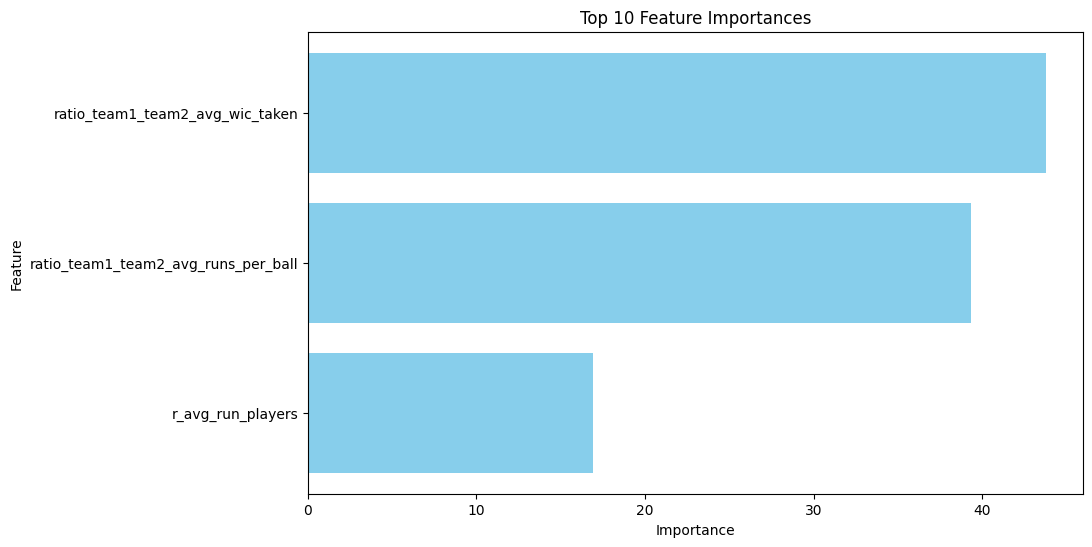

In [ ]:
import matplotlib.pyplot as plt

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
import pandas as pd

# Load the template for the second file
template_file2 = pd.read_csv('/content/submission_template_file2.csv')

# Assuming the feature importance and feature names have been computed as feature_importances_df
# We already have this DataFrame from the previous steps:
# feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Calculate total importance to normalize
total_importance = feature_importances_df['importance'].sum()

# Sort features by importance and rank them
sorted_features = feature_importances_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
sorted_features['rank'] = sorted_features.index + 1

# Define the feature descriptions
feature_descriptions = {
    'ratio_team1_team2_avg_wic_taken': 'ratio of average of wicket taken by team1 to the average of wicket taken by team2 (from match data)',
    'ratio_team1_team2_avg_runs': 'ratio of average of run scored by team1 to the average of runs scored by team2 (from match data)',
    'team_count_50runs_last15': 'Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games',
    'ground_id': 'unique id of the ground the match is held at',
    'team_winp_last5': 'Ratio of team1\'s win % to team2\'s win % in last 5 games',
    'ground_avg_runs_last15': 'average runs scored in the ground in last 15 games',
    'team1_winp_team2_last15': 'Team1\'s win percentage against Team2 in last 15 games',
    'team_batting_second': 'team who won the toss and choose to field first or team lose the toss and opponent decided to bat first',
    'team_batting_first': 'team who won the toss and choose to bat first or lose the toss and opponent decided to field first',
    'lighting': 'lighting condition of match - day/night, day or night match',
    'ratio_team1_team2_avg_runs_per_ball': 'ratio of average of run scored per ball by team1 to the average of runs scored per ball by team2 (from match data)',
    'r_avg_run_players': 'ratio of average of score of players of team1 and team2 who are playing in team1 and team2(from batsman level data)',
    'r_avg_wickets_players': 'ratio of average of wicketstaken by players of team1 and team2 who are playing in team1 and team2(from bowler level data)',
    'r_avg_strike_players': 'ratio of avg of strike rate of player of team1 to team2(from batsman level data)',
    'r_avg_fours_players': 'ratio of average of fours hit by players of team1 to team2',
    'r_avg_sixes_players': 'ratio of average of sixes hit by players of team1 to team2',
    'r_avg_economy_players':'ratio of avg of economy of bowler of team1 to team2',
    'r_avg_dots_players':'ratio of avg of dot bowled by players of team1 to team2',
    'toss' : 'team won the toss',
    'toss_dec' : 'team decided to bat or field first',
}




# Fill in the template
for i, row in sorted_features.iterrows():
    #if i < len(template_file2):
        feature_name = row['feature']
        template_file2.at[i, 'feat_id'] = i + 1
        template_file2.at[i, 'feat_name'] = feature_name
        template_file2.at[i, 'feat_description'] = feature_descriptions.get(feature_name, f"Description for {feature_name}")  # Use the description if available
        template_file2.at[i, 'model_feat_imp_train'] = (row['importance'] / total_importance) * 100  # Normalize and store as float percentage
        template_file2.at[i, 'feat_rank_train'] = row['rank']

# Save the filled template to a CSV file
template_file2.to_csv('/content/amex_2.csv', index=False)

print("Second CSV file filled and saved successfully.")



Second CSV file filled and saved successfully.


###polynomial model

In [ ]:
##pllynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_1)
X_val_poly = poly.transform(X_val_1)
X_train_all_poly = poly.fit_transform(X_train_all_1)
X_test_all_poly = poly.transform(X_test_all_1)

# Create a DataFrame with the new features
poly_features = poly.get_feature_names_out(X_train_1.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_features)
X_val_poly_df = pd.DataFrame(X_val_poly, columns=poly_features)
X_train_all_poly_df = pd.DataFrame(X_train_all_poly, columns=poly_features)
X_test_all_poly_df = pd.DataFrame(X_test_all_poly, columns=poly_features)

# Combine with original features
X_train_combined = pd.concat([X_train_1.reset_index(drop=True), X_train_poly_df], axis=1)
X_val_combined = pd.concat([X_val_1.reset_index(drop=True), X_val_poly_df], axis=1)
X_train_all_combined = pd.concat([X_train_all_1.reset_index(drop=True), X_train_all_poly_df], axis=1)
X_test_all_combined = pd.concat([X_test_all_1.reset_index(drop=True), X_test_all_poly_df], axis=1)

# Ensure unique feature names
def make_unique(column_names):
    seen = set()
    for i, col in enumerate(column_names):
        count = 1
        new_col = col
        while new_col in seen:
            new_col = f"{col}_{count}"
            count += 1
        seen.add(new_col)
        column_names[i] = new_col
    return column_names

X_train_combined.columns = make_unique(list(X_train_combined.columns))
X_val_combined.columns = make_unique(list(X_val_combined.columns))
X_train_all_combined.columns = make_unique(list(X_train_all_combined.columns))
X_test_all_combined.columns = make_unique(list(X_test_all_combined.columns))

In [ ]:
# Ensure unique feature names
def make_unique(column_names):
    seen = set()
    for i, col in enumerate(column_names):
        count = 1
        new_col = col
        while new_col in seen:
            new_col = f"{col}_{count}"
            count += 1
        seen.add(new_col)
        column_names[i] = new_col
    return column_names

X_train_combined.columns = make_unique(list(X_train_combined.columns))
X_val_combined.columns = make_unique(list(X_val_combined.columns))
X_train_all_combined.columns = make_unique(list(X_train_all_combined.columns))
X_test_all_combined.columns = make_unique(list(X_test_all_combined.columns))

In [ ]:
X_train_all_combined.shape

(948, 9)

In [ ]:


# Define the parameter grid for each model with regularization and early stopping
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]    # L2 regularization
}

param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]    # L2 regularization
}

param_grid_cat = {
    'iterations': [100, 200],
    'depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5],    # L2 regularization
    'early_stopping_rounds': [10] # Early stopping
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1]
}

# Initialize models
xgb_model = XGBClassifier()
lgb_model = LGBMClassifier()
cat_model = CatBoostClassifier(silent=True)
gb_model = GradientBoostingClassifier()

# Perform Grid Search for each model
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid_cat, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid searches
grid_search_xgb.fit(X_train_combined, Y_train_1)
grid_search_lgb.fit(X_train_combined, Y_train_1)
grid_search_cat.fit(X_train_combined, Y_train_1)
grid_search_gb.fit(X_train_combined, Y_train_1)

# Get the best estimators and parameters
best_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_
best_lgb = grid_search_lgb.best_estimator_
best_params_lgb = grid_search_lgb.best_params_
best_cat = grid_search_cat.best_estimator_
best_params_cat = grid_search_cat.best_params_
best_gb = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_

# Evaluate the best models
xgb_pred = best_xgb.predict(X_val_combined)
lgb_pred = best_lgb.predict(X_val_combined)
cat_pred = best_cat.predict(X_val_combined)
gb_pred = best_gb.predict(X_val_combined)

xgb_acc = accuracy_score(Y_val_1, xgb_pred)
lgb_acc = accuracy_score(Y_val_1, lgb_pred)
cat_acc = accuracy_score(Y_val_1, cat_pred)
gb_acc = accuracy_score(Y_val_1, gb_pred)

print(f'XGBoost Accuracy: {xgb_acc}, Best Params: {best_params_xgb}')
print(f'LightGBM Accuracy: {lgb_acc}, Best Params: {best_params_lgb}')
print(f'CatBoost Accuracy: {cat_acc}, Best Params: {best_params_cat}')
print(f'GradientBoosting Accuracy: {gb_acc}, Best Params: {best_params_gb}')

# Choose the best model based on validation accuracy
best_model_1 = None
best_params = None
best_accuracy = max(xgb_acc, lgb_acc, cat_acc, gb_acc)
if best_accuracy == xgb_acc:
    best_model_1 = best_xgb
    best_params = best_params_xgb
elif best_accuracy == lgb_acc:
    best_model_1 = best_lgb
    best_params = best_params_lgb
elif best_accuracy == cat_acc:
    best_model_1 = best_cat
    best_params = best_params_cat
else:
    best_model_1 = best_gb
    best_params = best_params_gb

print(f'Best Model: {best_model_1.__class__.__name__}')
print(f'Best Accuracy: {best_accuracy}')
print(f'Best Hyperparameters: {best_params}')



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 372, number of negative: 386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2263
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490765 -> initscore=-0.036944
[LightGBM] [Info] Start training from score -0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
# Use the best model to make predictions
train_predictions = best_model_1.predict(X_train_all_combined)
train_pred_proba = best_model_1.predict_proba(X_train_all_combined)

# Make predictions on the test set
test_predictions = best_model_1.predict(X_test_all_combined)
test_pred_proba = best_model_1.predict_proba(X_test_all_combined)

# Extract the probabilities of the predicted winning team
train_pred_proba = np.max(train_pred_proba, axis=1)
test_pred_proba = np.max(test_pred_proba, axis=1)

# Combine match_id and dataset_type with predictions for the output
train_output = pd.DataFrame({
    'match id': train_data['match id'],
    'dataset_type': 'train',
    'win_pred_team_id': np.where(train_predictions == 1, train_data['team1_id'], train_data['team2_id']),
    'win_pred_score': train_pred_proba,
    'train_algorithm': best_model_1.__class__.__name__,
    'is_ensemble': 'no',
    'train_hps_trees': best_params.get('iterations', best_params.get('n_estimators', 'N/A')),
    'train_hps_depth': best_params.get('depth', best_params.get('max_depth', 'N/A')),
    'train_hps_lr': best_params.get('learning_rate', 'N/A')
})

test_output = pd.DataFrame({
    'match id': test_data['match id'],
    'dataset_type': 'r1',
    'win_pred_team_id': np.where(test_predictions == 1, test_data['team1_id'], test_data['team2_id']),
    'win_pred_score': test_pred_proba,
    'train_algorithm': best_model_1.__class__.__name__,
    'is_ensemble': 'no',
    'train_hps_trees': best_params.get('iterations', best_params.get('n_estimators', 'N/A')),
    'train_hps_depth': best_params.get('depth', best_params.get('max_depth', 'N/A')),
    'train_hps_lr': best_params.get('learning_rate', 'N/A')
})

# Concatenate train and test outputs
output = pd.concat([test_output, train_output])

# Get the feature importance scores
feature_importances_df = pd.DataFrame({
    'feature': X_train_combined.columns,
    'importance': best_model_1.feature_importances_
})

# Sort the features by importance
top_features = feature_importances_df.sort_values(by='importance', ascending=False)

# Map the top features to indep_feat_id columns
for i, feature in enumerate(top_features['feature']):
    output[f'indep_feat_id{i+1}'] = feature

# Fill remaining indep_feat_id columns with 0 if there are fewer than 10 features
for i in range(len(top_features), 10):
    output[f'indep_feat_id{i+1}'] = 0




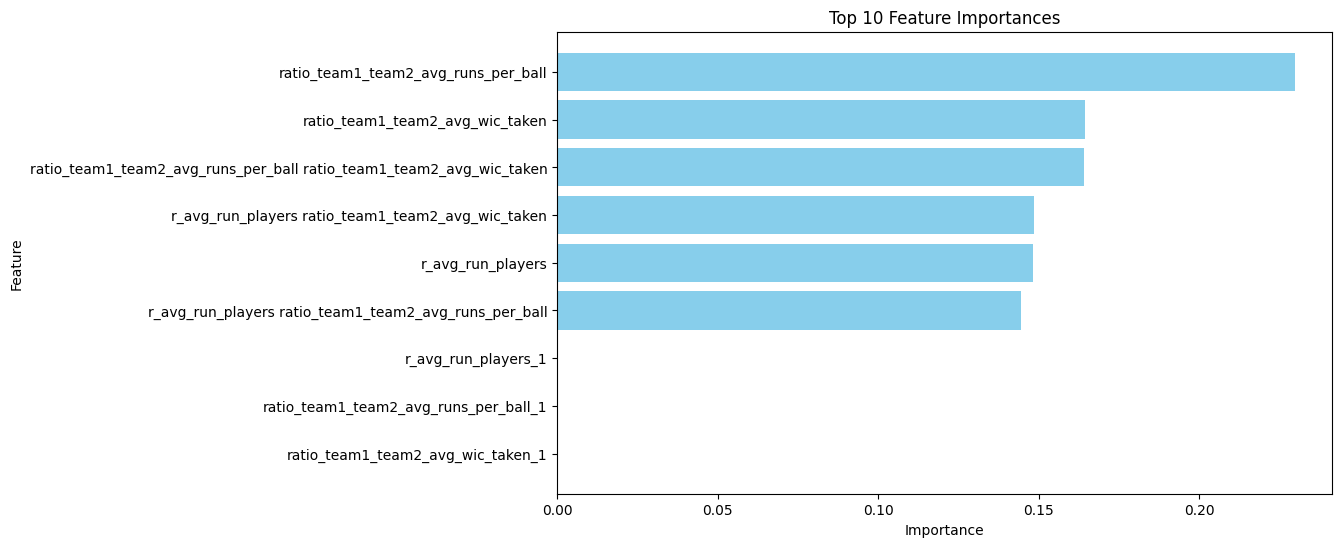

In [ ]:
import matplotlib.pyplot as plt

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
'''
# Assuming X_train_1, Y_train_1, X_val_1, Y_val_tej are already defined
# X_train_1 = ...
# Y_train_1 = ...
# X_val_tej = ...
# Y_val_tej = ...

# Define the parameter grid for each model
param_grid_xgb = {
    'n_estimators':  [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]    # L2 regularization
}

param_grid_lgb = {
    'n_estimators':  [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [ 0.01, 0.1],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]    # L2 regularization
}

param_grid_cat = {
    'iterations':  [100, 200],
    'depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5],    # L2 regularization
    'early_stopping_rounds': [10] # Early stopping
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

# Initialize models
xgb_model = XGBClassifier()
lgb_model = LGBMClassifier()
cat_model = CatBoostClassifier(silent=True)
gb_model = GradientBoostingClassifier()

# Perform Grid Search for each model
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid_cat, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid searches
grid_search_xgb.fit(X_train_1, Y_train_1)
grid_search_lgb.fit(X_train_1, Y_train_1)
grid_search_cat.fit(X_train_1, Y_train_1)
grid_search_gb.fit(X_train_1, Y_train_1)

# Get the best estimators and parameters
best_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_
best_lgb = grid_search_lgb.best_estimator_
best_params_lgb = grid_search_lgb.best_params_
best_cat = grid_search_cat.best_estimator_
best_params_cat = grid_search_cat.best_params_
best_gb = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('lgb', best_lgb),
    ('cat', best_cat),
    ('gb', best_gb)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train_1, Y_train_1)

# Evaluate the ensemble model
ensemble_pred = ensemble_model.predict(X_val_1)
ensemble_acc = accuracy_score(Y_val_1, ensemble_pred)

print(f'Ensemble Accuracy: {ensemble_acc}')

best_model = ensemble_model



[LightGBM] [Info] Number of positive: 372, number of negative: 386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2691
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490765 -> initscore=-0.036944
[LightGBM] [Info] Start training from score -0.036944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
'''
# Combine hyperparameters and algorithm names
train_hps_trees = f"{best_params_xgb.get('n_estimators', 'N/A')};{best_params_lgb.get('n_estimators', 'N/A')};{best_params_cat.get('iterations', 'N/A')};{best_params_gb.get('n_estimators', 'N/A')}"
train_hps_depth = f"{best_params_xgb.get('max_depth', 'N/A')};{best_params_lgb.get('max_depth', 'N/A')};{best_params_cat.get('depth', 'N/A')};{best_params_gb.get('max_depth', 'N/A')}"
train_hps_lr = f"{best_params_xgb.get('learning_rate', 'N/A')};{best_params_lgb.get('learning_rate', 'N/A')};{best_params_cat.get('learning_rate', 'N/A')};{best_params_gb.get('learning_rate', 'N/A')}"
train_algorithm = "XGBoost;LightGBM;CatBoost;GradientBoosting"


# Use the ensemble model to make predictions
train_predictions = ensemble_model.predict(X_train_new1)
train_pred_proba = ensemble_model.predict_proba(X_train_new1)

# Make predictions on the test set
test_predictions = ensemble_model.predict(X_test_new1)
test_pred_proba = ensemble_model.predict_proba(X_test_new1)

# Extract the probabilities of the predicted winning team
train_pred_proba = np.max(train_pred_proba, axis=1)
test_pred_proba = np.max(test_pred_proba, axis=1)

# Combine match_id and dataset_type with predictions for the output
train_output = pd.DataFrame({
    'match id': train_data['match id'],
    'dataset_type': 'train',
    'win_pred_team_id': np.where(train_predictions == 1, train_data['team1_id'], train_data['team2_id']),
    'win_pred_score': train_pred_proba,
    'train_algorithm': train_algorithm,
    'is_ensemble': 'yes',
    'train_hps_trees': train_hps_trees,
    'train_hps_depth': train_hps_depth,
    'train_hps_lr': train_hps_lr,
})

test_output = pd.DataFrame({
    'match id': test_data['match id'],
    'dataset_type': 'r1',
    'win_pred_team_id': np.where(test_predictions == 1, test_data['team1_id'], test_data['team2_id']),
    'win_pred_score': test_pred_proba,
    'train_algorithm': train_algorithm,
    'is_ensemble': 'yes',
    'train_hps_trees': train_hps_trees,
    'train_hps_depth': train_hps_depth,
    'train_hps_lr': train_hps_lr,
})

# Concatenate train and test outputs
output = pd.concat([test_output, train_output])

# Get the feature importance scores
# Note: VotingClassifier does not have feature_importances_, we can use an average of the individual importances
feature_importances_df = pd.DataFrame({
    'feature': X_train_new1.columns,
    'importance': (
        best_xgb.feature_importances_ +
        best_lgb.feature_importances_ +
        best_cat.feature_importances_ +
        best_gb.feature_importances_
    ) / 4
})

# Sort the features by importance
top_features = feature_importances_df.sort_values(by='importance', ascending=False).head(10)

# Map the top features to indep_feat_id columns
for i, feature in enumerate(top_features['feature']):
    output[f'indep_feat_id{i+1}'] = feature

# Fill remaining indep_feat_id columns with 0 if there are fewer than 10 features
for i in range(len(top_features), 10):
    output[f'indep_feat_id{i+1}'] = 0


output.to_csv('/content/amex_1.csv', index=False)
print("Output CSV file saved successfully.")


Output CSV file saved successfully.
